In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import MatrixProductFunctions as mp
#import imageio
import os
import cmath
import math
#import qutip as qt
from numba import njit
import matplotlib.animation as animation
%matplotlib inline
from ipywidgets import IntProgress, HTML
from IPython.display import display
import pickle
import matplotlib.gridspec as gridspec
from scipy.linalg import sqrtm
#import ffmpeg
import socket

### График эволюции числа фотонов в случае с малоамплитудной накачкой

In [173]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-07-30_17-05-01/photon_dynamics.pkl', 'rb') as f:
    photon_number_dynamics_weak = pickle.load(f)

In [174]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/Tests_of_spdc/Data_for_article/alpha_20_comparison/Everything/solutions_for_Fock_basis_alpha_10_photon_dynamics_#3_100000_steps.pkl', 'rb') as f:
    photon_number_dynamics_Fock_weak = pickle.load(f)

In [175]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-07-30_17-05-01/solutions.pkl', 'rb') as f:
    set_of_solutions_weak = pickle.load(f)

In [176]:
bonds_weak_pump = [mp.get_bond(solution) for solution in set_of_solutions_weak[::2]]

In [177]:
fock_basis_ph_d = []
for i in range(0,len(photon_number_dynamics_Fock_weak[0]),10):
    fock_basis_ph_d.append(photon_number_dynamics_Fock_weak[0][i])

fock_basis_ph_d_2 = []
for i in range(0,len(photon_number_dynamics_Fock_weak[0]),10):
    fock_basis_ph_d_2.append(photon_number_dynamics_Fock_weak[1][i])

fock_basis_ph_d_3 = []
for i in range(0,len(fock_basis_ph_d_2),1):
    fock_basis_ph_d_3.append(2*fock_basis_ph_d_2[i]+fock_basis_ph_d[i])

In [393]:
len(photon_number_dynamics_weak[0]), len(fock_basis_ph_d_2), len(bonds_weak_pump)

(46, 51, 451)

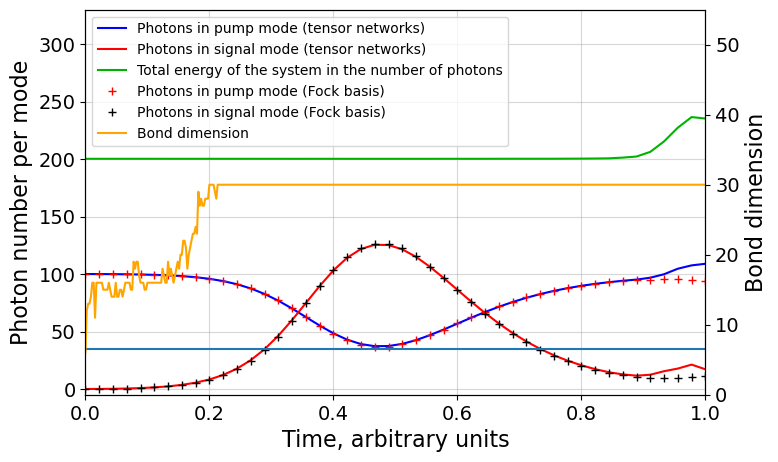

In [392]:
cut_number = 46
fig, ax1 = plt.subplots(figsize = (8,5))
plt.grid(alpha=0.5)
ax1.set_xlabel("Time, arbitrary units", fontsize = 16)
ax1.set_ylabel("Photon number per mode", fontsize = 16)
line1, = ax1.plot(np.linspace(0, 1, len(photon_number_dynamics_weak[0][:cut_number])), np.array(photon_number_dynamics_weak[0][:cut_number])-0.5, "b-", label = "Photons in pump mode (tensor networks)")
line2, = ax1.plot(np.linspace(0, 1, len(photon_number_dynamics_weak[0][:cut_number])), np.array(photon_number_dynamics_weak[1][:cut_number])-0.5, "r-", label = "Photons in signal mode (tensor networks)")
line3, = ax1.plot(np.linspace(0, 1, len(photon_number_dynamics_weak[0][:cut_number])), 2*np.array(photon_number_dynamics_weak[0][:cut_number]) + np.array(photon_number_dynamics_weak[1][:cut_number])-1.2, color = "#00b300", label = "Total energy of the system in the number of photons")
line4, = ax1.plot(np.linspace(0, 1, cut_number), fock_basis_ph_d_2[:cut_number], color = "red", marker = '+', fillstyle = 'none', linestyle = "None", label = "Photons in pump mode (Fock basis)")
line5, = ax1.plot(np.linspace(0, 1, cut_number), fock_basis_ph_d[:cut_number], linestyle = "None", marker = '+', fillstyle = 'none', color = "black", label = "Photons in signal mode (Fock basis)")
line6, = ax1.plot(np.linspace(0,1, 10), 35*np.ones(10))
ax2 = ax1.twinx()
ax2.set_ylabel("Bond dimension", fontsize = 16)
line6, = ax2.plot(np.linspace(0, 1, len(bonds_weak_pump)), bonds_weak_pump, color = 'orange', label = "Bond dimension")
lines = [line1, line2, line3, line4, line5, line6]
labels = [line.get_label() for line in lines]
plt.xlim(0,1)
ax1.set_ylim(-5,330)
ax2.set_ylim(0,55)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend(lines, labels, loc='upper left')
#plt.savefig('Photon_dynamics_alpha_10_new_data.png', bbox_inches='tight')
plt.show()

In [76]:
photon_number_dynamics[1][0]

array([0.5])

### График эволюции числа фотонов в случае с высокоамплитудной накачкой

In [184]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/high_pump_high_quality_calc/solutions.pkl', 'rb') as f:
    set_of_solutions_large_pump = pickle.load(f)[:1001]

In [185]:
len(set_of_solutions_large_pump)

1001

In [186]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/high_pump_high_quality_calc/photon_dynamics.pkl', 'rb') as f:
    photon_dynamics_large_pump = pickle.load(f)
photon_dynamics_large_pump = [ph_d[:101] for ph_d in photon_dynamics_large_pump]

In [187]:
len(photon_dynamics_large_pump[0])

101

In [188]:
bonds_strong_pump = [mp.get_bond(solution) for solution in set_of_solutions_large_pump]

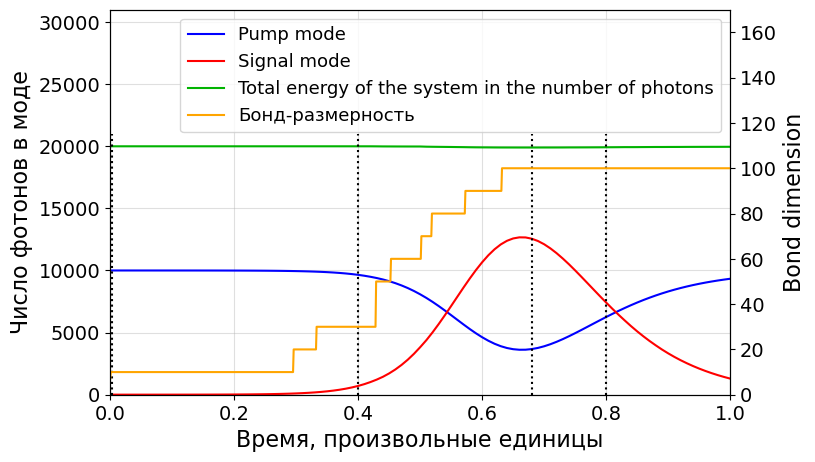

In [191]:
fig, ax1 = plt.subplots(figsize = (8,5))
plt.grid(alpha=0.4)
#ax1.set_xlabel("Time, arbitrary units", fontsize = 16)
#ax1.set_ylabel("Photon number per mode", fontsize = 16)
ax1.set_xlabel("Время, произвольные единицы", fontsize = 16)
ax1.set_ylabel("Число фотонов в моде", fontsize = 16)
line1, = ax1.plot(np.linspace(0,1,len(photon_dynamics_large_pump[0][::1])), photon_dynamics_large_pump[0][::1], "b-", linewidth=1.5, label = "Pump mode")
line2, = ax1.plot(np.linspace(0,1,len(photon_dynamics_large_pump[1][::1])), photon_dynamics_large_pump[1][::1], "r-", linewidth=1.5, label = "Signal mode")
line3, = ax1.plot(np.linspace(0,1,len(photon_dynamics_large_pump[2][::1])), 2*np.array(photon_dynamics_large_pump[0][::1])+np.array(photon_dynamics_large_pump[1][::1]), color = "#00b300", linewidth=1.5, label = "Total energy of the system in the number of photons")
#line1, = ax1.plot(np.linspace(0,1,len(photon_dynamics_general[0][::1])), photon_dynamics_general[0][::1], linewidth=1.5, label = "Мода накачки")
#line2, = ax1.plot(np.linspace(0,1,len(photon_dynamics_general[1][::1])), photon_dynamics_general[1][::1], linewidth=1.5, label = "Сигнальная мода")
#line3, = ax1.plot(np.linspace(0,1,len(photon_dynamics_general[2][::1])), 2*np.array(photon_dynamics_general[0][::1])+np.array(photon_dynamics_general[1][::1]), linewidth=1.5, label = "Общая энергия системы в числе фотонов")
line4, = ax1.plot([0.003]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
line5, = ax1.plot([0.4]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
line5, = ax1.plot([0.68]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
line5, = ax1.plot([0.8]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
#line6, = ax1.plot(np.linspace(0,1,10), 3500*np.ones(10))
ax2 = ax1.twinx()
ax2.set_ylabel("Bond dimension", fontsize = 16)
#ax2.set_ylabel("Бонд-размерность", fontsize = 16)
line6, = ax2.plot(np.linspace(0,1,len(bonds_strong_pump)), bonds_strong_pump, color = "orange", label = "Бонд-размерность")
lines = [line1, line2, line3, line6]
labels = [line.get_label() for line in lines]
plt.xlim(0,1)
ax1.set_ylim(-5,31000)
ax2.set_ylim(0,170)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend(lines, labels, loc='upper right', fontsize = 13)
#plt.savefig('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/photon_dynamics_large_pump_changed_colors_for_ShMU.png', bbox_inches='tight')
plt.show()

### Двойной график для слабой и мощной накачки

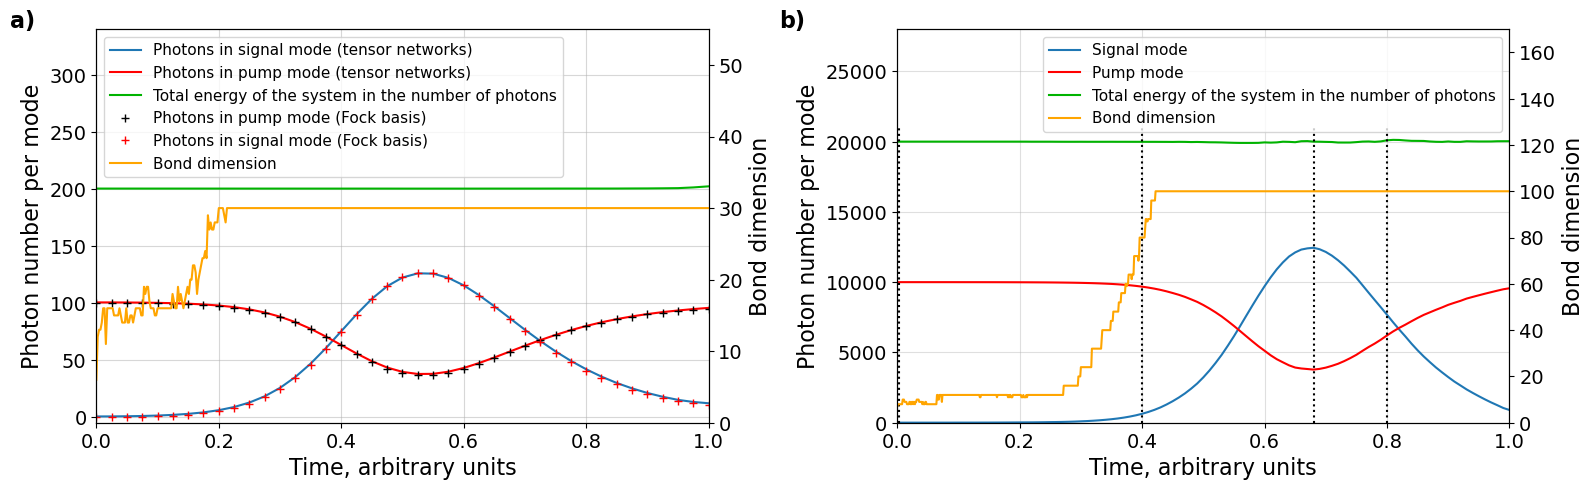

In [451]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем фигуру с двумя подграфиками рядом
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Первый график (левый) с подписью "a)"
ax1.grid(alpha=0.5)
ax1.set_xlabel("Time, arbitrary units", fontsize=16)
ax1.set_ylabel("Photon number per mode", fontsize=16)
line1, = ax1.plot(np.linspace(0, 1, len(photon_number_dynamics[0][:41])), photon_number_dynamics[1][:41], label="Photons in signal mode (tensor networks)")
line2, = ax1.plot(np.linspace(0, 1, len(photon_number_dynamics[0][:41])), np.array(photon_number_dynamics[0][:41]), "r-", label="Photons in pump mode (tensor networks)")
line3, = ax1.plot(np.linspace(0, 1, len(photon_number_dynamics[0][:41])), 2*np.array(photon_number_dynamics[0][:41]) + np.array(photon_number_dynamics[1][:41])-1.2, color="#00b300", label="Total energy of the system in the number of photons")
line4, = ax1.plot(np.linspace(0, 1, 41), fock_basis_ph_d_2[:41], color="black", marker='+', fillstyle='none', linestyle="None", label="Photons in pump mode (Fock basis)")
line5, = ax1.plot(np.linspace(0, 1, 41), fock_basis_ph_d[:41], linestyle="None", marker='+', fillstyle='none', color="red", label="Photons in signal mode (Fock basis)")
ax1_right = ax1.twinx()
ax1_right.set_ylabel("Bond dimension", fontsize=16)
line6, = ax1_right.plot(np.linspace(0, 1, len(bonds_weak_pump)), bonds_weak_pump, color='orange', label="Bond dimension")
lines1 = [line1, line2, line3, line4, line5, line6]
labels1 = [line.get_label() for line in lines1]
ax1.set_xlim(0, 1)
ax1.set_ylim(-5, 340)
ax1_right.set_ylim(0, 55)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1_right.tick_params(axis='y', which='major', labelsize=14)
ax1.legend(lines1, labels1, loc='upper left', fontsize=11)

# Добавляем подпись "a)" в левый верхний угол
ax1.text(-0.1, 1.05, "a)", transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Второй график (правый) с подписью "b)"
ax2.grid(alpha=0.4)
ax2.set_xlabel("Time, arbitrary units", fontsize=16)
ax2.set_ylabel("Photon number per mode", fontsize=16)
line1, = ax2.plot(np.linspace(0,1,len(photon_dynamics_general[1][::1])), photon_dynamics_general[1][::1], linewidth=1.5, label="Signal mode")
line2, = ax2.plot(np.linspace(0,1,len(photon_dynamics_general[0][::1])), photon_dynamics_general[0][::1], "r-", linewidth=1.5, label="Pump mode")
line3, = ax2.plot(np.linspace(0,1,len(photon_dynamics_general[2][::1])), 2*np.array(photon_dynamics_general[0][::1])+np.array(photon_dynamics_general[1][::1]), color="#00b300", linewidth=1.5, label="Total energy of the system in the number of photons")
line4, = ax2.plot([0.003]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
line5, = ax2.plot([0.4]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
line6, = ax2.plot([0.68]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
line7, = ax2.plot([0.8]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
ax2_right = ax2.twinx()
ax2_right.set_ylabel("Bond dimension", fontsize=16)
line8, = ax2_right.plot(np.linspace(0,1,len(bonds_strong_pump)), bonds_strong_pump, color="orange", label="Bond dimension")
lines2 = [line1, line2, line3, line8]
labels2 = [line.get_label() for line in lines2]
ax2.set_xlim(0, 1)
ax2.set_ylim(-5, 28000)
ax2_right.set_ylim(0, 170)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2_right.tick_params(axis='y', which='major', labelsize=14)
ax2.legend(lines2, labels2, loc='upper right', fontsize=11)

# Добавляем подпись "b)" в левый верхний угол
ax2.text(-0.15, 1.05, "b)", transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Настраиваем расстояние между графиками
plt.tight_layout()

# Показываем или сохраняем результат
#plt.savefig('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-07-30_17-05-01/photon_dynamics_two_figs_№2.png', bbox_inches='tight')
plt.show()

### Четверной график

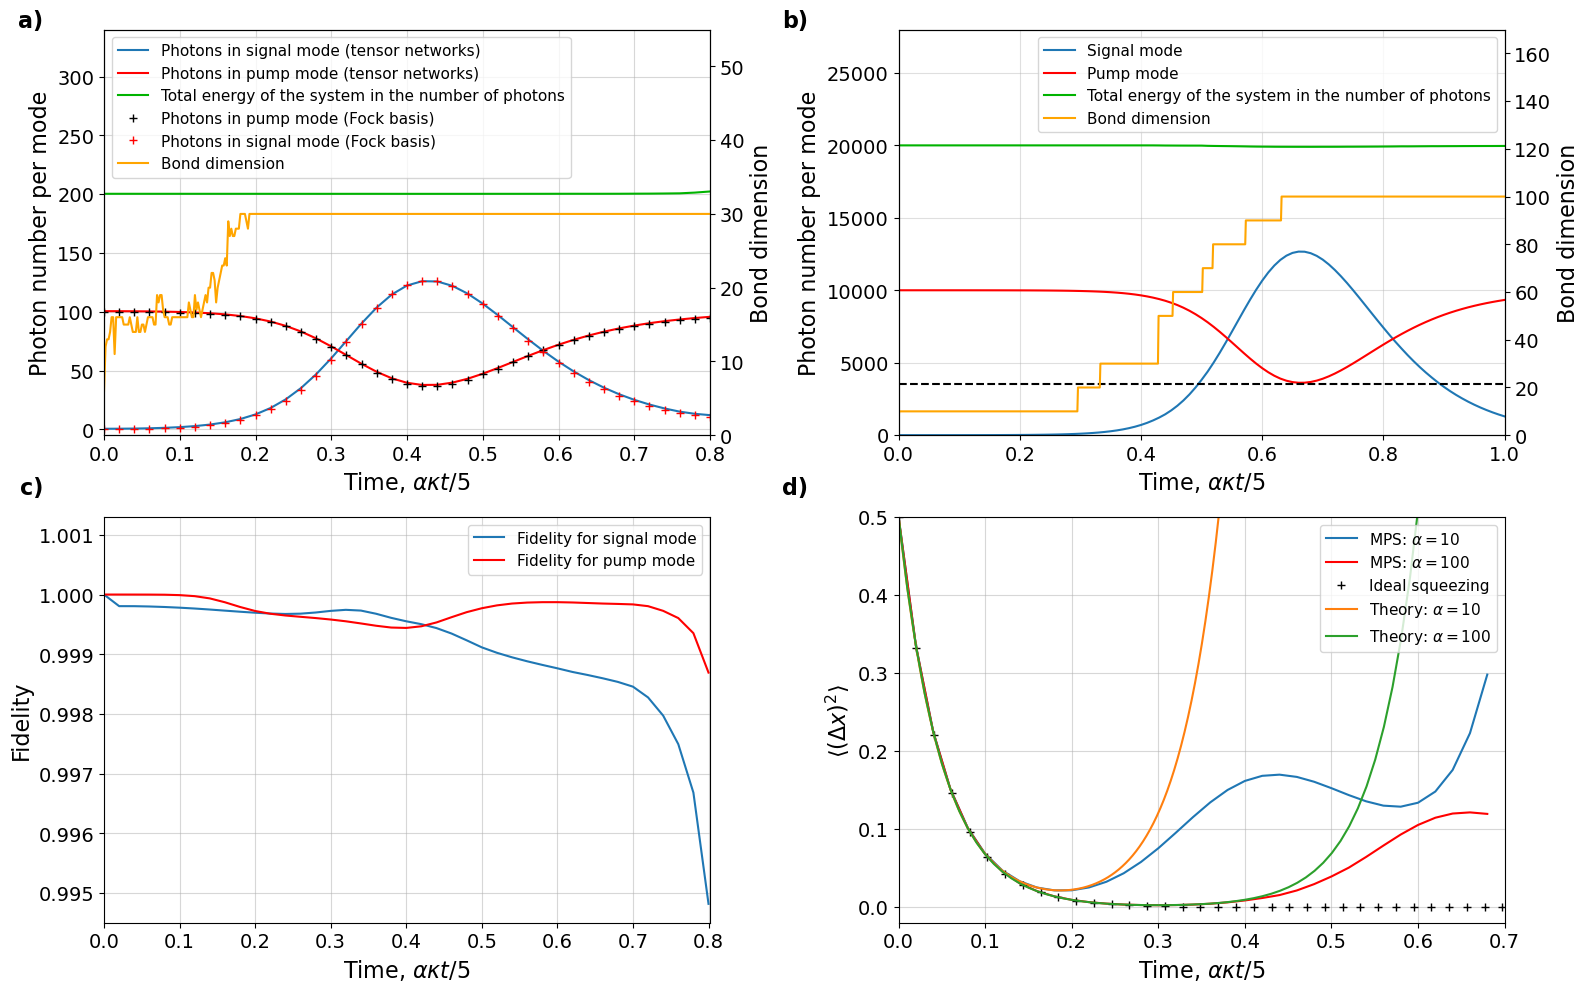

In [408]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем фигуру с двумя подграфиками рядом
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# Первый график (левый) с подписью "a)"
ax1.grid(alpha=0.5)
ax1.set_xlabel(r"Time, $\alpha \kappa t / 5$", fontsize=16)
ax1.set_ylabel("Photon number per mode", fontsize=16)
line1, = ax1.plot(np.linspace(0, 0.8, len(photon_number_dynamics_weak[0][:41])), photon_number_dynamics_weak[1][:41], label="Photons in signal mode (tensor networks)")
line2, = ax1.plot(np.linspace(0, 0.8, len(photon_number_dynamics_weak[0][:41])), np.array(photon_number_dynamics_weak[0][:41]), "r-", label="Photons in pump mode (tensor networks)")
line3, = ax1.plot(np.linspace(0, 0.8, len(photon_number_dynamics_weak[0][:41])), 2*np.array(photon_number_dynamics_weak[0][:41]) + np.array(photon_number_dynamics_weak[1][:41])-1.2, color="#00b300", label="Total energy of the system in the number of photons")
line4, = ax1.plot(np.linspace(0, 0.8, 41), fock_basis_ph_d_2[:41], color="black", marker='+', fillstyle='none', linestyle="None", label="Photons in pump mode (Fock basis)")
line5, = ax1.plot(np.linspace(0, 0.8, 41), fock_basis_ph_d[:41], linestyle="None", marker='+', fillstyle='none', color="red", label="Photons in signal mode (Fock basis)")
ax1_right = ax1.twinx()
ax1_right.set_ylabel("Bond dimension", fontsize=16)
line6, = ax1_right.plot(np.linspace(0, 0.8, len(bonds_weak_pump[:401])), bonds_weak_pump[:401], color='orange', label="Bond dimension")
lines1 = [line1, line2, line3, line4, line5, line6]
labels1 = [line.get_label() for line in lines1]
ax1.set_xlim(0, 0.8)
ax1.set_ylim(-5, 340)
ax1_right.set_ylim(0, 55)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1_right.tick_params(axis='y', which='major', labelsize=14)
ax1.legend(lines1, labels1, loc='upper left', fontsize=11)

# Добавляем подпись "a)" в левый верхний угол
ax1.text(-0.1, 1.05, "a)", transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Второй график (правый) с подписью "b)"
ax2.grid(alpha=0.4)
ax2.set_xlabel(r"Time, $\alpha \kappa t / 5$", fontsize=16)
ax2.set_ylabel("Photon number per mode", fontsize=16)
line1, = ax2.plot(np.linspace(0,1,len(photon_dynamics_large_pump[1][::1])), photon_dynamics_large_pump[1][::1], linewidth=1.5, label="Signal mode")
line2, = ax2.plot(np.linspace(0,1,len(photon_dynamics_large_pump[0][::1])), photon_dynamics_large_pump[0][::1], "r-", linewidth=1.5, label="Pump mode")
line3, = ax2.plot(np.linspace(0,1,len(photon_dynamics_large_pump[2][::1])), 2*np.array(photon_dynamics_large_pump[0][::1])+np.array(photon_dynamics_large_pump[1][::1]), color="#00b300", linewidth=1.5, label="Total energy of the system in the number of photons")
line4, = ax2.plot(np.linspace(0,1,10), [3500]*10, linestyle='dashed', color='black', linewidth=1.5)
#line5, = ax2.plot([0.4]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
#line6, = ax2.plot([0.68]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
#line7, = ax2.plot([0.8]*5, np.linspace(0,21000,5), linestyle='dotted', color='black', linewidth=1.5)
ax2_right = ax2.twinx()
ax2_right.set_ylabel("Bond dimension", fontsize=16)
line8, = ax2_right.plot(np.linspace(0,1,len(bonds_strong_pump)), bonds_strong_pump, color="orange", label="Bond dimension")
lines2 = [line1, line2, line3, line8]
labels2 = [line.get_label() for line in lines2]
ax2.set_xlim(0, 1)
ax2.set_ylim(-5, 28000)
ax2_right.set_ylim(0, 170)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2_right.tick_params(axis='y', which='major', labelsize=14)
ax2.legend(lines2, labels2, loc='upper right', fontsize=11)

line9, = ax3.plot(np.linspace(0,0.8,len(np.real(fidelity_storage_signal[:41]))), np.real(fidelity_storage_signal[:41]), label = "Fidelity for signal mode")
line10, = ax3.plot(np.linspace(0,0.8,len(np.real(fidelity_storage_pump[:41]))), np.real(fidelity_storage_pump[:41]), 'r-', label = "Fidelity for pump mode")
ax3.set_xlabel(r"Time, $\alpha \kappa t / 5$", fontsize = 16)
ax3.set_ylabel("Fidelity", fontsize = 16)
ax3.grid(alpha=0.5)
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.set_xlim(0,0.802)
ax3.set_ylim(0.9945,1.0013)
ax3.legend(fontsize = 11)

ax4.set_xlabel(r"Time, $\alpha \kappa t / 5$", fontsize=16)
ax4.set_ylabel(r'$\langle(\Delta x)^2 \rangle$', fontsize=16)
ax4.plot(np.linspace(0, 0.8, len(squeezing_weak_changed))[:i_cut], squeezing_weak_changed[:i_cut], label = r'MPS: $\alpha=10$')
ax4.plot(np.linspace(0, 0.8, len(squeezing_strong_changed))[:i_cut], squeezing_strong_changed[:i_cut], 'r-', label = r'MPS: $\alpha=100$')
ax4.plot(np.linspace(0, 0.8, 40)[:i_cut], 0.5*np.exp(-2*np.linspace(0, 8, 40))[:i_cut], linestyle = 'None', marker = '+', color = 'black', label = 'Ideal squeezing')
#ax4.plot(np.linspace(high_amp_t-0.02, high_amp_t+0.02, 100), [high_amp]*100, color='black', linewidth=2.5)
#ax4.plot(np.linspace(low_amp_t-0.02, low_amp_t+0.02, 100), [low_amp]*100, color='black', linewidth=2.5)
#ax4.plot([high_amp_t]*100, np.linspace(high_amp-0.02, high_amp+0.02, 100), color='black', linewidth=2.5)
#ax4.plot([low_amp_t]*100, np.linspace(low_amp-0.02, low_amp+0.02, 100), color='black', linewidth=2.5)

ax4.plot(x, x_quadrature(x, 100), label = r'Theory: $\alpha=10$')
ax4.plot(x*10, x_quadrature(x, 10000), label = r'Theory: $\alpha=100$')

ax4.grid(alpha=0.5)
#ax4.xticks(fontsize = 14)
#ax4.yticks(fontsize = 14)
ax4.set_xlim(0,0.7)
ax4.set_ylim(-0.02,0.5)
ax4.tick_params(axis='both', which='major', labelsize=14)
ax4.legend(fontsize = 11)

# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# # Создаём вставку (увеличенную область)
# axins = inset_axes(ax4, width="30%", height="30%", loc='center right')  # можно поменять loc

# # Рисуем те же кривые на вставке
# axins.plot(np.linspace(0, 0.8, len(squeezing_weak_changed))[:i_cut], squeezing_weak_changed[:i_cut], label = r'$\alpha=10$')
# axins.plot(np.linspace(0, 0.8, len(squeezing_strong_changed))[:i_cut], squeezing_strong_changed[:i_cut], 'r-', label = r'$\alpha=100$')
# axins.plot(np.linspace(0, 0.8, 40)[:i_cut], 0.5*np.exp(-2*np.linspace(0, 8, 40))[:i_cut], linestyle = 'None', marker = '+', color = 'black', label = 'ideal squeezing')
# axins.plot(np.linspace(high_amp_t-0.05, high_amp_t+0.05, 100), [high_amp]*100, color='black', linewidth=1.5)
# axins.plot(np.linspace(low_amp_t-0.05, low_amp_t+0.05, 100), [low_amp]*100, color='black', linewidth=1.5)
# axins.plot([high_amp_t]*100, np.linspace(high_amp-0.03, high_amp+0.03, 100), color='black', linewidth=1.5)
# axins.plot([low_amp_t]*100, np.linspace(low_amp-0.03, low_amp+0.03, 100), color='black', linewidth=1.5)
# # Пределы вставки
# axins.set_xlim(0.1, 0.4)
# axins.set_ylim(-0.005, 0.035)

# # Убираем лишние деления на осях
# axins.tick_params(axis='both', which='major', labelsize=10)

# # Соединяем inset с основной областью
# mark_inset(ax4, axins, loc1=2, loc2=4, fc="none", ec="0.5")


# high_amp = min(x_quadrature(x, 10000))
# high_amp_t = np.argmin(x_quadrature(x, 10000))/1000*10
# low_amp = min(x_quadrature(x, 100))
# low_amp_t = np.argmin(x_quadrature(x, 100))/1000
# high_amp, high_amp_t, low_amp, low_amp_t

# ax4.plot(np.linspace(0, 1, len(number_of_elements)), 100*np.array(number_of_elements)/2**25, label = r'Pump $\alpha=10$')
# ax4.plot(np.linspace(0, 1, len(number_of_elements_ha)), 100*np.array(number_of_elements_ha)/2**30, "r-", label = r'Pump $\alpha=100$')
# ax4.set_xlabel("Time, arbitrary units", fontsize = 16)
# ax4.set_ylabel("Inverse Compression Ratio, %", fontsize = 16)
# ax4.grid(alpha=0.3)
# ax4.set_xlim(0,1)
# ax4.set_ylim(-0.0003,0.105)
# ax4.legend(fontsize=13)

# Добавляем подпись "b)" в левый верхний угол
ax2.text(-0.15, 1.05, "b)", transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
ax1.text(-0.1, -0.1, "c)", transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
ax2.text(-0.15, -0.1, "d)", transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Настраиваем расстояние между графиками
plt.tight_layout()

# Показываем или сохраняем результат
#plt.savefig('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/for_article/four_plots_on_one_figure__changed_5.png', bbox_inches='tight')
plt.show()

### Степень сжатия, которую дает MPS по сравнению с обычным векторным форматом

In [206]:
n1 = 12
n2 = 13
n_step = 200

In [207]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-07-30_17-05-01/solutions.pkl', 'rb') as f:
    set_of_solutions = pickle.load(f)

In [208]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/high_pump_high_quality_calc/solutions.pkl', 'rb') as f:
    set_of_solutions_high_amplitude = pickle.load(f)[:1001]

In [209]:
number_of_elements = []
for mps in set_of_solutions:
    number_of_elements.append(mp.calculate_number_of_elements_in_MPS(mps))

In [210]:
number_of_elements_ha = []
for mps in set_of_solutions_high_amplitude:
    number_of_elements_ha.append(mp.calculate_number_of_elements_in_MPS(mps))

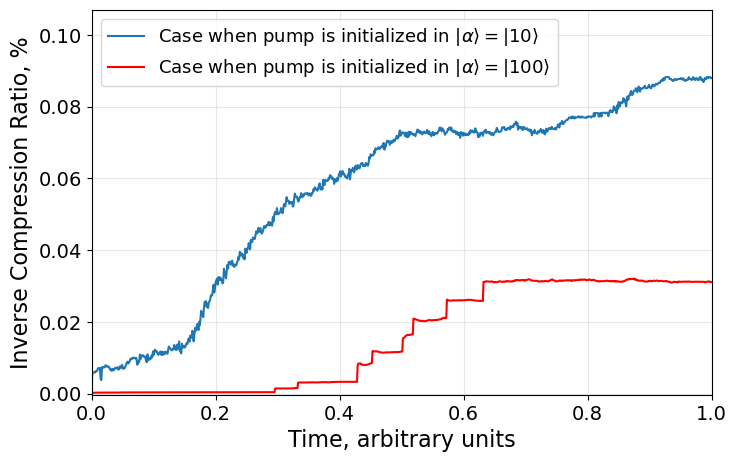

In [212]:
plt.figure(figsize = (8,5))
plt.plot(np.linspace(0, 1, len(number_of_elements)), 100*np.array(number_of_elements)/2**25, label = r'Case when pump is initialized in $|\alpha\rangle=|10\rangle$')
plt.plot(np.linspace(0, 1, len(number_of_elements_ha)), 100*np.array(number_of_elements_ha)/2**30, "r-", label = r'Case when pump is initialized in $|\alpha\rangle=|100\rangle$')
#plt.plot(np.linspace(0, 1, len(number_of_elements)), 100*np.array(number_of_elements)/2**25, label = r'Мода накачки в состоянии $|\alpha\rangle=|10\rangle$')
#plt.plot(np.linspace(0, 1, len(number_of_elements_ha)), 100*np.array(number_of_elements_ha)/2**30, "r-", label = r'Мода накачки в состоянии $|\alpha\rangle=|100\rangle$')
plt.xlabel("Time, arbitrary units", fontsize = 16)
plt.ylabel("Inverse Compression Ratio, %", fontsize = 16)
#plt.xlabel("Время, произвольные единицы", fontsize = 16)
#plt.ylabel("Инвертированный к. сжатия, %", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha=0.3)
plt.xlim(0,1)
plt.ylim(-0.0003,0.107)
plt.legend(fontsize=13)
#plt.savefig('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/for_article/inverse_compression_ratio.png', bbox_inches='tight')
plt.show()

### Fidelity матриц плотности двух методов

#### Загрузка матриц плотности, посчитанных разными методами и переведенными в Фоковский базис

In [195]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/Tests_of_spdc/Data_for_article/alpha_20_comparison/Selected_for_article/solutions_for_Fock_basis_alpha_10_#3_100000_steps.pkl', 'rb') as f:
    density_matrices_in_Fb = pickle.load(f)

In [196]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-07-30_17-05-01/density_matrices_converted_to_Fb_signal.pkl', 'rb') as f:
    density_matrices_converted_to_Fb_signal = pickle.load(f)

In [197]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-07-30_17-05-01/density_matrices_converted_to_Fb_pump.pkl', 'rb') as f:
    density_matrices_converted_to_Fb_pump = pickle.load(f)

#### Обрезание матриц плотности, изначально посчитанных в Фоковском базисе, до нужного размера

In [198]:
density_matrices_initially_in_Fb_signal = []
density_matrices_initially_in_Fb_pump = []
for i in range(0, len(density_matrices_in_Fb), 10):
    dm_Fb = density_matrices_in_Fb[i].reshape(300, 300)
    sol_U, sol_S, sol_V = np.linalg.svd(dm_Fb, full_matrices=False)
    density_matrix_one_fp = sol_U @ np.diag(sol_S) 
    density_matrix_one = density_matrix_one_fp @ np.conj(density_matrix_one_fp.T)
    
    density_matrix_two_fp = (np.diag(sol_S) @ sol_V).T 
    density_matrix_two = density_matrix_two_fp @ np.conj(density_matrix_two_fp.T)

    density_matrices_initially_in_Fb_signal.append(density_matrix_two[:250, :250].real)
    density_matrices_initially_in_Fb_pump.append(density_matrix_one[:250, :250].real)

#### Функция вычисления Fidelity двух матриц

In [199]:
def compute_fidelity(rho1, rho2):
    return (np.trace(sqrtm(sqrtm(rho1)@rho2@sqrtm(rho1))))**2

#### Вычисление Fidelity для матриц

In [200]:
fidelity_storage_signal = []
fidelity_storage_pump = []
for i in range(min(len(density_matrices_initially_in_Fb_signal), len(density_matrices_converted_to_Fb_signal))):
    fidelity_storage_signal.append(compute_fidelity(density_matrices_initially_in_Fb_signal[i]/np.trace(density_matrices_initially_in_Fb_signal[i]), density_matrices_converted_to_Fb_signal[i]/np.trace(density_matrices_converted_to_Fb_signal[i])))
for i in range(min(len(density_matrices_initially_in_Fb_pump), len(density_matrices_converted_to_Fb_pump))):
    fidelity_storage_pump.append(compute_fidelity(density_matrices_initially_in_Fb_pump[i]/np.trace(density_matrices_initially_in_Fb_pump[i]), density_matrices_converted_to_Fb_pump[i]/np.trace(density_matrices_converted_to_Fb_pump[i])))    

#### Построение графика Fidelity

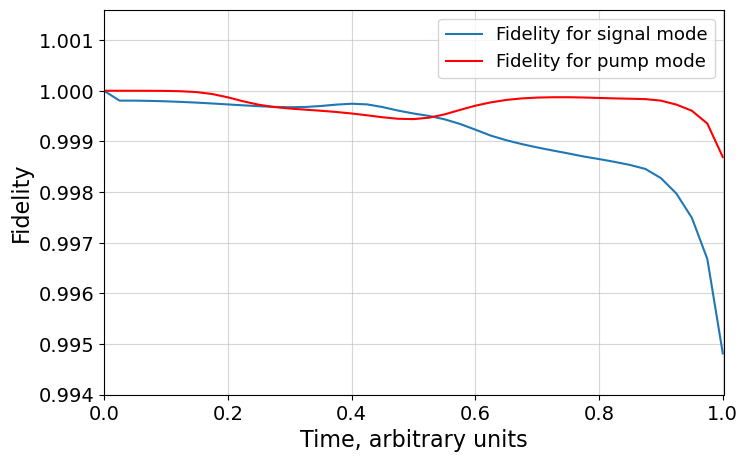

In [202]:
fig, ax1 = plt.subplots(figsize = (8,5))
plt.plot(np.linspace(0,1,len(np.real(fidelity_storage_signal[:41]))), np.real(fidelity_storage_signal[:41]), label = "Fidelity for signal mode")
plt.plot(np.linspace(0,1,len(np.real(fidelity_storage_pump[:41]))), np.real(fidelity_storage_pump[:41]), 'r-', label = "Fidelity for pump mode")

plt.xlabel("Time, arbitrary units", fontsize = 16)
plt.ylabel("Fidelity", fontsize = 16)

plt.grid(alpha=0.5)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax1.tick_params(axis='both', which='major', labelsize=14)

plt.xlim(0,1.002)
plt.ylim(0.994,1.0016)

plt.legend(fontsize = 13)
#plt.savefig('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-07-30_17-05-01/Fidelity.png', bbox_inches='tight')
plt.show()

### Картинки матриц плотности в случае мощной накачки

In [90]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/high_pump_high_quality_calc/solutions.pkl', 'rb') as f:
    set_of_solutions_large_pump = pickle.load(f)[:1001]

In [91]:
len(set_of_solutions_large_pump)

1001

In [92]:
n1 = 15
n2 = 15
shrink = 0.6

x_bond2=10
x_bias=141.4213562373095
x_left=292.842712474619
x_right=10

In [93]:
dm1_pump = mp.find_reduced_density_matrix2(set_of_solutions_large_pump[0], 0, n1, 3)
dm1_signal = mp.find_reduced_density_matrix2(set_of_solutions_large_pump[0], 1, n2, 3)
dm1_pump = dm1_pump / np.trace(dm1_pump)
dm1_signal = dm1_signal / np.trace(dm1_signal)

dm2_pump = mp.find_reduced_density_matrix2(set_of_solutions_large_pump[400], 0, n1, 3)
dm2_signal = mp.find_reduced_density_matrix2(set_of_solutions_large_pump[400], 1, n2, 3)
dm2_pump = dm2_pump / np.trace(dm2_pump)
dm2_signal = dm2_signal / np.trace(dm2_signal)

dm3_pump = mp.find_reduced_density_matrix2(set_of_solutions_large_pump[680], 0, n1, 2)
dm3_signal = mp.find_reduced_density_matrix2(set_of_solutions_large_pump[680], 1, n2, 2)
dm3_pump = dm3_pump / np.trace(dm3_pump)
dm3_signal = dm3_signal / np.trace(dm3_signal)

dm4_pump = mp.find_reduced_density_matrix2(set_of_solutions_large_pump[800], 0, n1, 2)
dm4_signal = mp.find_reduced_density_matrix2(set_of_solutions_large_pump[800], 1, n2, 2)
dm4_pump = dm4_pump / np.trace(dm4_pump)
dm4_signal = dm4_signal / np.trace(dm4_signal)

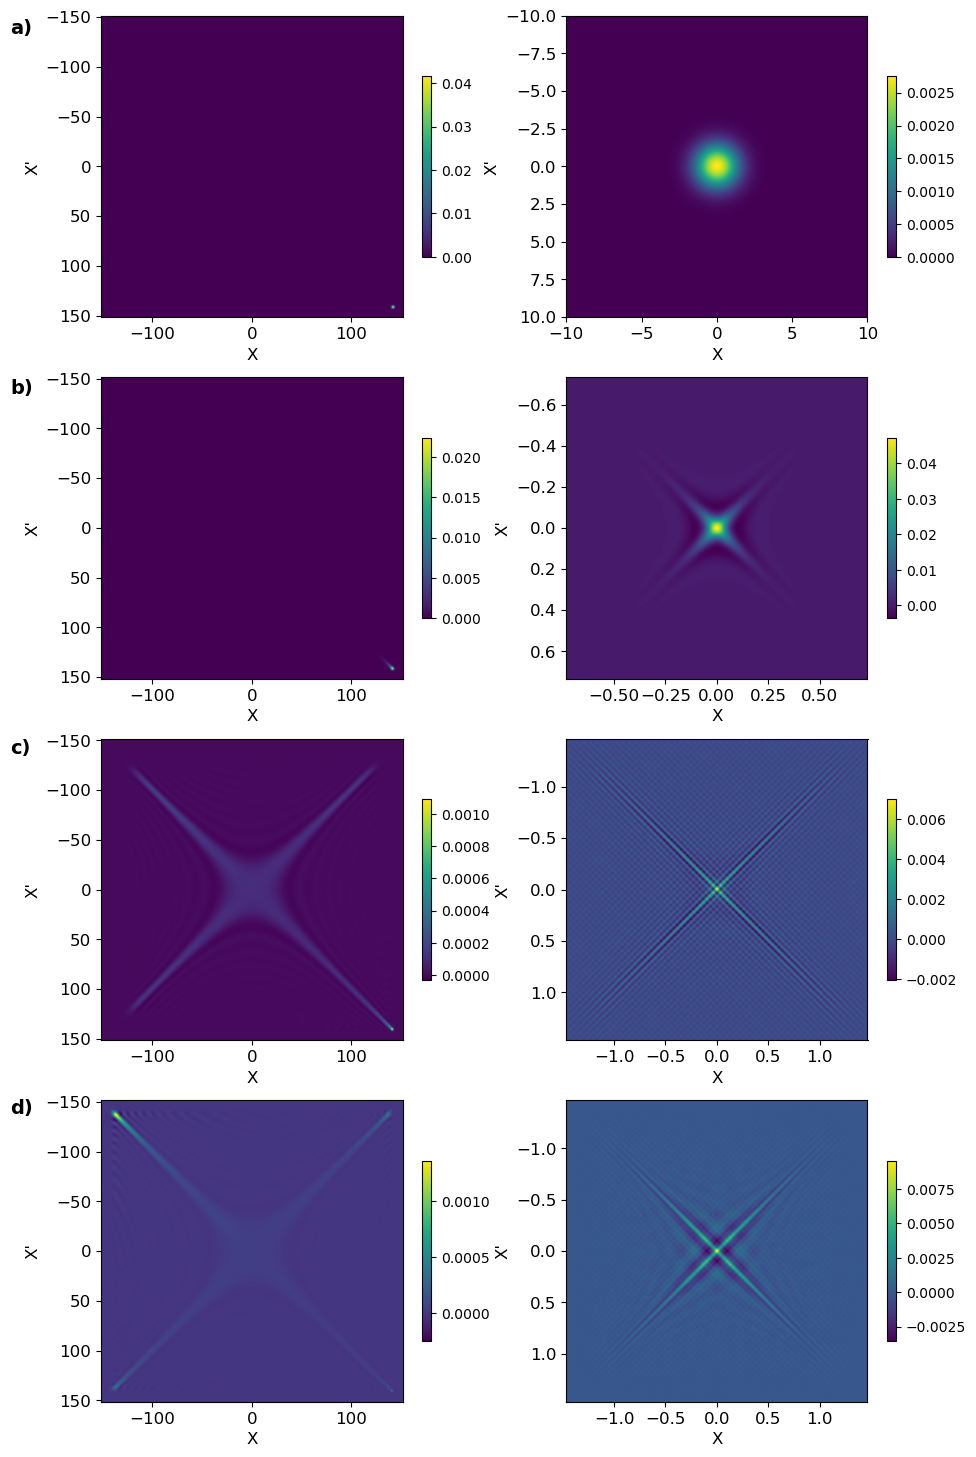

In [516]:
fig, axes = plt.subplots(4,2, figsize = (11,18))

for i, label in enumerate(['a)', 'b)', 'c)', 'd)']):
    fig.text(0.05, 0.87 - i*0.2, label, fontsize=14, fontweight='bold')

im1 = axes[0,0].imshow(np.real(dm1_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
im2 = axes[0,1].imshow(np.real(dm1_signal), extent = [-x_bond2, x_bond2, x_bond2, -x_bond2])
im3 = axes[1,0].imshow(np.real(dm2_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
im4 = axes[1,1].imshow(np.real(dm2_signal)[2048-150:2048+150, 2048-150:2048+150], extent = [-x_bond2*150/2048, x_bond2*150/2048, x_bond2*150/2048, -x_bond2*150/2048])
im5 = axes[2,0].imshow(np.real(dm3_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
im6 = axes[2,1].imshow(np.real(dm3_signal)[4096-300:4096+300, 4096-300:4096+300], extent = [-x_bond2*300/2048, x_bond2*300/2048, x_bond2*300/2048, -x_bond2*300/2048])
im7 = axes[3,0].imshow(np.real(dm4_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
im8 = axes[3,1].imshow(np.real(dm4_signal)[4096-300:4096+300, 4096-300:4096+300], extent = [-x_bond2*300/2048, x_bond2*300/2048, x_bond2*300/2048, -x_bond2*300/2048])

fig.colorbar(im1, ax=axes[0,0], shrink=shrink)
fig.colorbar(im2, ax=axes[0,1], shrink=shrink)
fig.colorbar(im3, ax=axes[1,0], shrink=shrink)
fig.colorbar(im4, ax=axes[1,1], shrink=shrink)
fig.colorbar(im5, ax=axes[2,0], shrink=shrink)
fig.colorbar(im6, ax=axes[2,1], shrink=shrink)
fig.colorbar(im7, ax=axes[3,0], shrink=shrink)
fig.colorbar(im8, ax=axes[3,1], shrink=shrink)

axes[0,0].set_xlabel("X", fontsize = 12)
axes[0,0].set_ylabel("X'", fontsize = 12)
axes[0,1].set_xlabel("X", fontsize = 12)
axes[0,1].set_ylabel("X'", fontsize = 12)

axes[1,0].set_xlabel("X", fontsize = 12)
axes[1,0].set_ylabel("X'", fontsize = 12)
axes[1,1].set_xlabel("X", fontsize = 12)
axes[1,1].set_ylabel("X'", fontsize = 12)

axes[2,0].set_xlabel("X", fontsize = 12)
axes[2,0].set_ylabel("X'", fontsize = 12)
axes[2,1].set_xlabel("X", fontsize = 12)
axes[2,1].set_ylabel("X'", fontsize = 12)

axes[3,0].set_xlabel("X", fontsize = 12)
axes[3,0].set_ylabel("X'", fontsize = 12)
axes[3,1].set_xlabel("X", fontsize = 12)
axes[3,1].set_ylabel("X'", fontsize = 12)

axes[0,0].tick_params(axis='both', which='major', labelsize=12)
axes[0,1].tick_params(axis='both', which='major', labelsize=12)
axes[1,0].tick_params(axis='both', which='major', labelsize=12)
axes[1,1].tick_params(axis='both', which='major', labelsize=12)
axes[2,0].tick_params(axis='both', which='major', labelsize=12)
axes[2,1].tick_params(axis='both', which='major', labelsize=12)
axes[3,0].tick_params(axis='both', which='major', labelsize=12)
axes[3,1].tick_params(axis='both', which='major', labelsize=12)

plt.show()

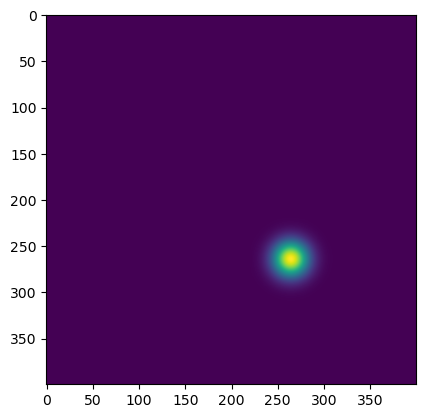

In [527]:
plt.imshow(np.real(dm1_pump)[4096-400:4096, 4096-400:4096])
plt.show()

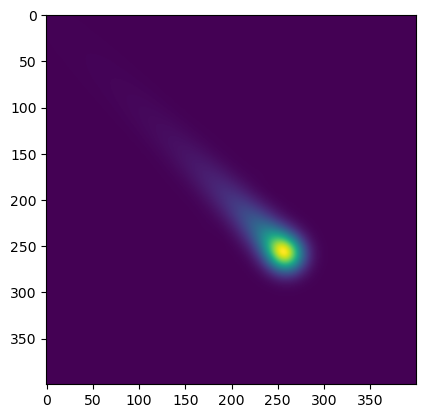

In [528]:
plt.imshow(np.real(dm2_pump)[4096-400:4096, 4096-400:4096])
plt.show()

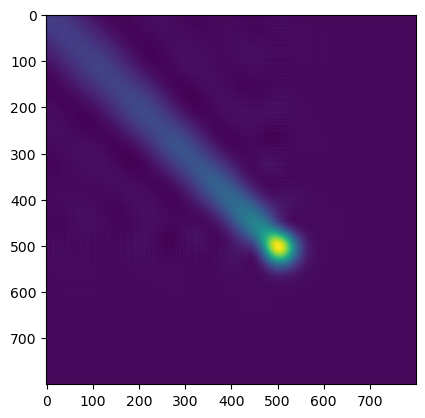

In [529]:
plt.imshow(np.real(dm3_pump)[4096*2-800:4096*2, 4096*2-800:4096*2])
plt.show()

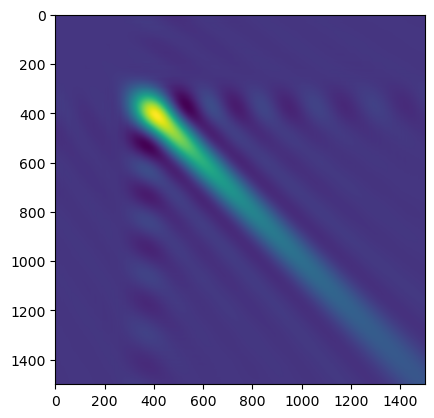

In [531]:
plt.imshow(np.real(dm4_pump)[0:1500, 0:1500])
plt.show()

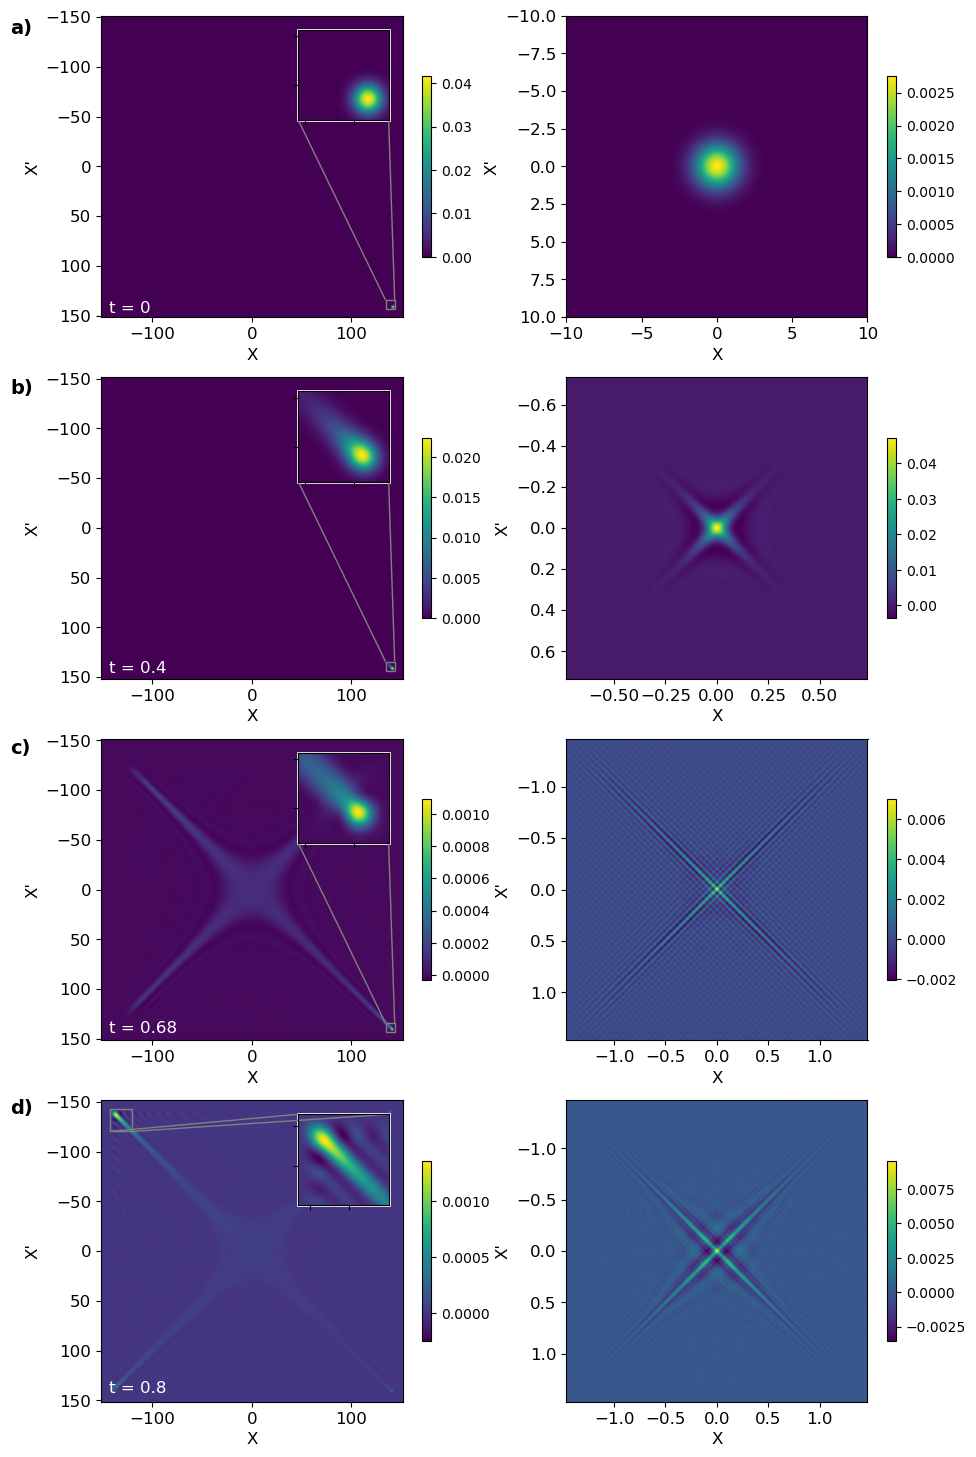

In [50]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, axes = plt.subplots(4,2, figsize = (11,18))

for i, label in enumerate(['a)', 'b)', 'c)', 'd)']):
    fig.text(0.05, 0.87 - i*0.2, label, fontsize=14, fontweight='bold')

for i, label in enumerate(['t = 0', 't = 0.4', 't = 0.68', 't = 0.8']):
    fig.text(0.14, 0.715 - i*0.2, label, fontsize=12, color = 'white')

# Функция для создания инсета
def create_inset(ax, data, x_bias, x_left, x_right):
    axins = inset_axes(ax, width="30%", height="30%", loc=1, borderpad=1)
    axins.patch.set_edgecolor('white')
    axins.patch.set_linewidth(2)
    
    # Область увеличения (правый нижний угол)
    zoom_x_start = x_bias*0.95
    zoom_x_end = x_bias*1.015
    zoom_y_start = x_bias*0.95
    zoom_y_end = x_bias*1.015
    
    # Показать увеличенную область
    im_zoom = axins.imshow(np.real(data), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
    axins.set_xlim(zoom_x_start, zoom_x_end)
    axins.set_ylim(zoom_y_end, zoom_y_start)
    axins.tick_params(labelleft=False, labelbottom=False)
    
    # Соединительные линии
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", color = "red", ec="0.5")
    return im_zoom

def create_inset_2(ax, data, x_bias, x_left, x_right):
    axins = inset_axes(ax, width="30%", height="30%", loc=1, borderpad=1)
    axins.patch.set_edgecolor('white')
    axins.patch.set_linewidth(2)
    
    # Область увеличения (правый нижний угол)
    zoom_x_start = -x_bias*0.85
    zoom_x_end = -x_bias*1.01
    zoom_y_start = -x_bias*0.85
    zoom_y_end = -x_bias*1.01
    
    # Показать увеличенную область
    im_zoom = axins.imshow(np.real(data), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
    axins.set_xlim(zoom_x_end, zoom_x_start)
    axins.set_ylim(zoom_y_start, zoom_y_end)
    axins.tick_params(labelleft=False, labelbottom=False)
    
    # Соединительные линии
    mark_inset(ax, axins, loc1=2, loc2=1, fc="none", color = "red", ec="0.5")
    return im_zoom

# Main plots with insets for left column
im1 = axes[0,0].imshow(np.real(dm1_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset(axes[0,0], dm1_pump, x_bias, x_left, x_right)

im3 = axes[1,0].imshow(np.real(dm2_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset(axes[1,0], dm2_pump, x_bias, x_left, x_right)

im5 = axes[2,0].imshow(np.real(dm3_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset(axes[2,0], dm3_pump, x_bias, x_left, x_right)

im7 = axes[3,0].imshow(np.real(dm4_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset_2(axes[3,0], dm4_pump, x_bias, x_left, x_right)

# Right column plots (без инсетов)
im2 = axes[0,1].imshow(np.real(dm1_signal), extent = [-x_bond2, x_bond2, x_bond2, -x_bond2])
im4 = axes[1,1].imshow(np.real(dm2_signal)[2048-150:2048+150, 2048-150:2048+150], extent = [-x_bond2*150/2048, x_bond2*150/2048, x_bond2*150/2048, -x_bond2*150/2048])
im6 = axes[2,1].imshow(np.real(dm3_signal)[4096-300:4096+300, 4096-300:4096+300], extent = [-x_bond2*300/2048, x_bond2*300/2048, x_bond2*300/2048, -x_bond2*300/2048])
im8 = axes[3,1].imshow(np.real(dm4_signal)[4096-300:4096+300, 4096-300:4096+300], extent = [-x_bond2*300/2048, x_bond2*300/2048, x_bond2*300/2048, -x_bond2*300/2048])

# Colorbars
fig.colorbar(im1, ax=axes[0,0], shrink=shrink)
fig.colorbar(im2, ax=axes[0,1], shrink=shrink)
fig.colorbar(im3, ax=axes[1,0], shrink=shrink)
fig.colorbar(im4, ax=axes[1,1], shrink=shrink)
fig.colorbar(im5, ax=axes[2,0], shrink=shrink)
fig.colorbar(im6, ax=axes[2,1], shrink=shrink)
fig.colorbar(im7, ax=axes[3,0], shrink=shrink)
fig.colorbar(im8, ax=axes[3,1], shrink=shrink)

# Labels
for i in range(4):
    for j in range(2):
        axes[i,j].set_xlabel("X", fontsize = 12)
        axes[i,j].set_ylabel("X'", fontsize = 12)
        axes[i,j].tick_params(axis='both', which='major', labelsize=12)

#plt.savefig('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-07-30_17-05-01/Density_matrices.png', bbox_inches='tight')
plt.show()

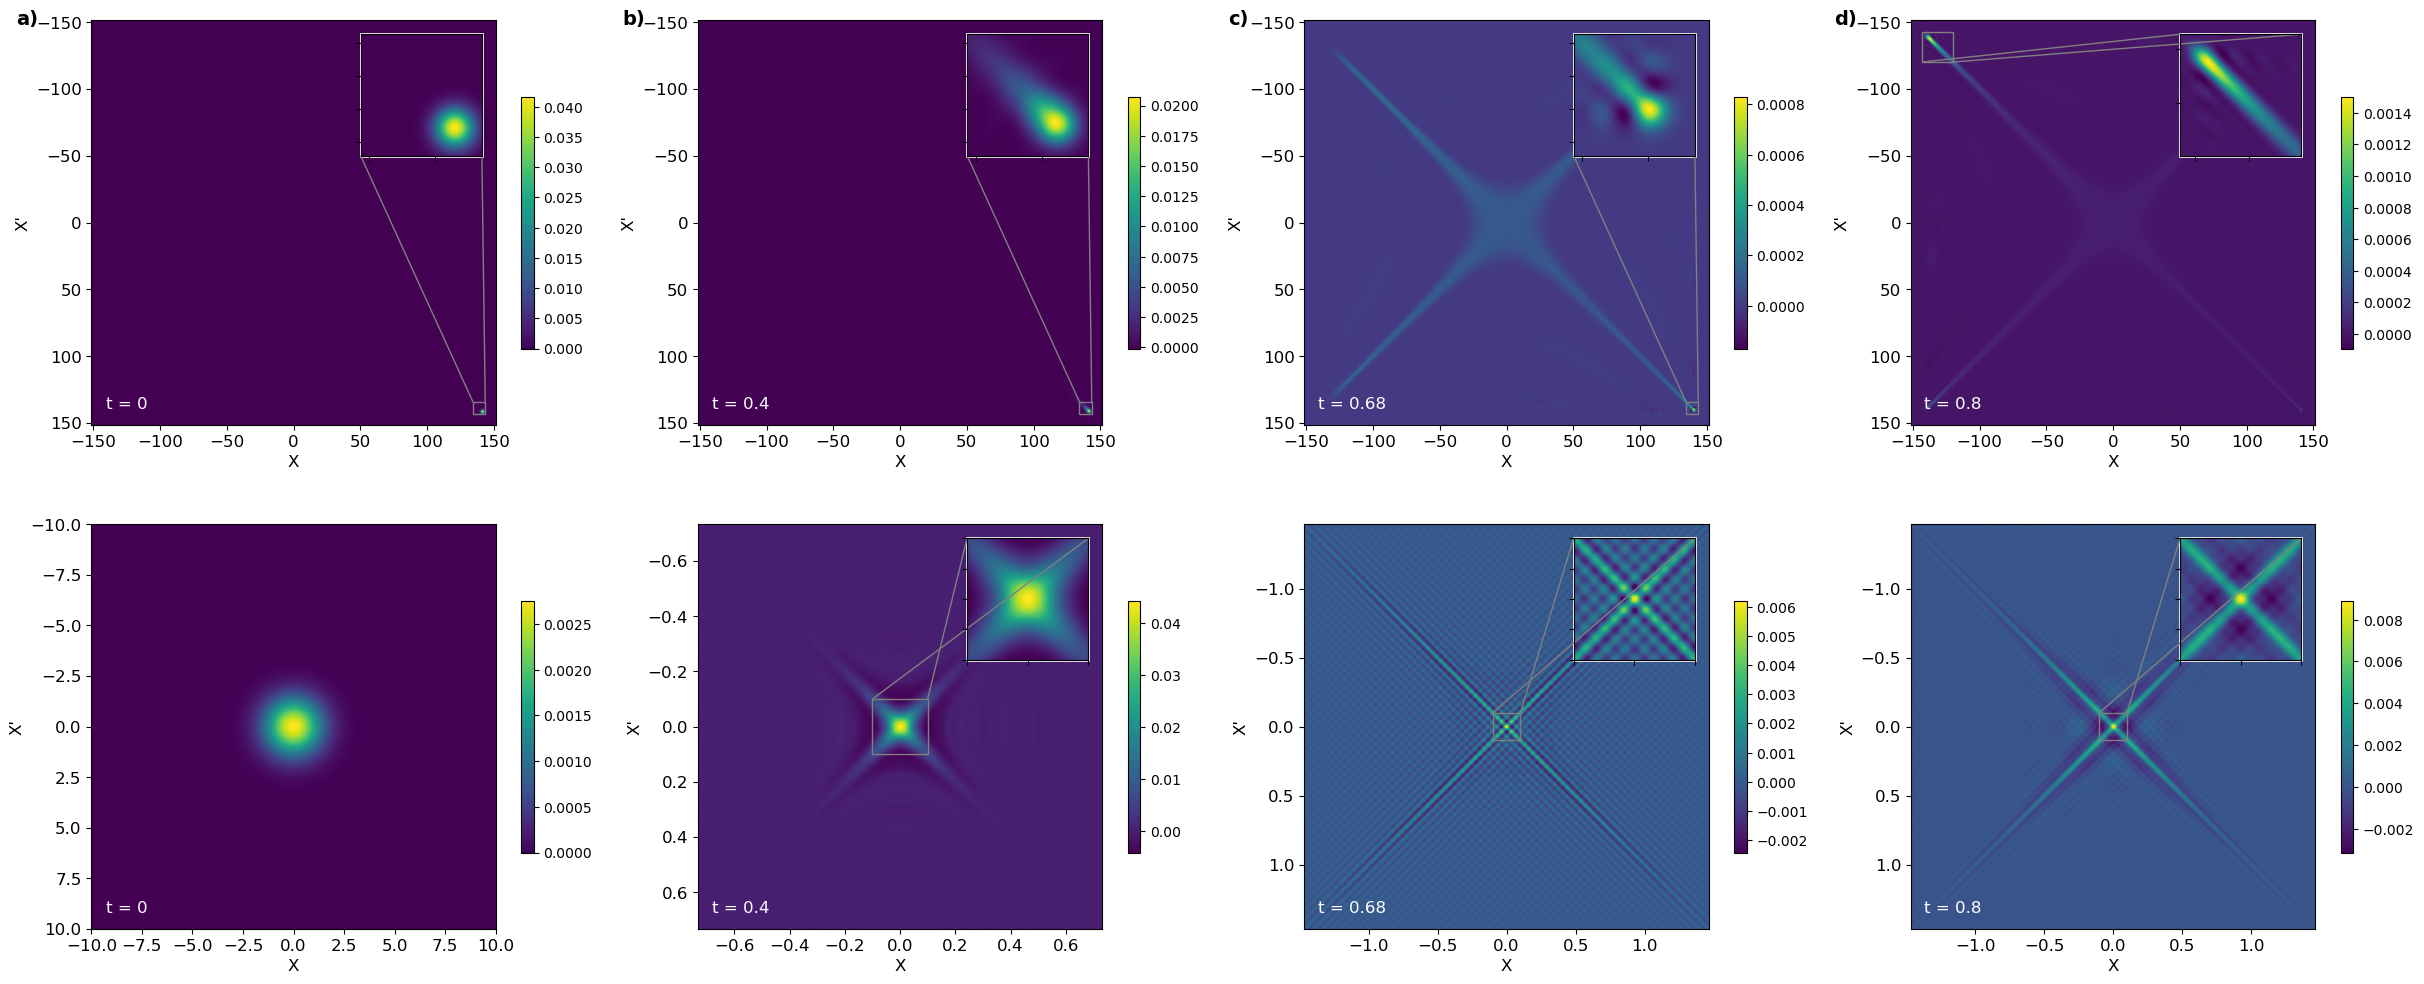

In [486]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, axes = plt.subplots(2,4, figsize = (30,12))

for i, label in enumerate(['a)', 'b)', 'c)', 'd)']):
    fig.text(0.1 + i*0.202, 0.87, label, fontsize=14, fontweight='bold')

for i, label in enumerate(['t = 0', 't = 0.4', 't = 0.68', 't = 0.8']):
    fig.text(0.13 + i*0.202, 0.13, label, fontsize=12, color = 'white')

for i, label in enumerate(['t = 0', 't = 0.4', 't = 0.68', 't = 0.8']):
    fig.text(0.13 + i*0.202, 0.55, label, fontsize=12, color = 'white')

# Функция для создания инсета
def create_inset(ax, data, x_bias, x_left, x_right):
    axins = inset_axes(ax, width="30%", height="30%", loc=1, borderpad=1)
    axins.patch.set_edgecolor('white')
    axins.patch.set_linewidth(2)
    
    # Область увеличения (правый нижний угол)
    zoom_x_start = x_bias*0.95
    zoom_x_end = x_bias*1.015
    zoom_y_start = x_bias*0.95
    zoom_y_end = x_bias*1.015
    
    # Показать увеличенную область
    im_zoom = axins.imshow(np.real(data), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
    axins.set_xlim(zoom_x_start, zoom_x_end)
    axins.set_ylim(zoom_y_end, zoom_y_start)
    axins.tick_params(labelleft=False, labelbottom=False)
    
    # Соединительные линии
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", color = "red", ec="0.5")
    return im_zoom

def create_inset_2(ax, data, x_bias, x_left, x_right):
    axins = inset_axes(ax, width="30%", height="30%", loc=1, borderpad=1)
    axins.patch.set_edgecolor('white')
    axins.patch.set_linewidth(2)
    
    # Область увеличения (правый нижний угол)
    zoom_x_start = -x_bias*0.85
    zoom_x_end = -x_bias*1.01
    zoom_y_start = -x_bias*0.85
    zoom_y_end = -x_bias*1.01
    
    # Показать увеличенную область
    im_zoom = axins.imshow(np.real(data), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
    axins.set_xlim(zoom_x_end, zoom_x_start)
    axins.set_ylim(zoom_y_start, zoom_y_end)
    axins.tick_params(labelleft=False, labelbottom=False)
    
    # Соединительные линии
    mark_inset(ax, axins, loc1=2, loc2=1, fc="none", color = "red", ec="0.5")
    return im_zoom

def create_inset_3(ax, data, x_bond, x_left, x_right):
    axins = inset_axes(ax, width="30%", height="30%", loc=1, borderpad=1)
    axins.patch.set_edgecolor('white')
    axins.patch.set_linewidth(2)
    
    # Область увеличения (правый нижний угол)
    zoom_x_start = -x_bond*0.02
    zoom_x_end = x_bond*0.02
    zoom_y_start = -x_bond*0.02
    zoom_y_end = x_bond*0.02
    
    # Показать увеличенную область
    im_zoom = axins.imshow(np.real(data), extent = [-x_left, x_right, x_right, -x_left])
    axins.set_xlim(zoom_x_end, zoom_x_start)
    axins.set_ylim(zoom_y_start, zoom_y_end)
    axins.tick_params(labelleft=False, labelbottom=False)
    
    # Соединительные линии
    mark_inset(ax, axins, loc1=2, loc2=1, fc="none", color = "red", ec="0.5")
    return im_zoom

# Main plots with insets for left column
im1 = axes[0,0].imshow(np.real(dm1_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset(axes[0,0], dm1_pump, x_bias, x_left, x_right)

im3 = axes[0,1].imshow(np.real(dm2_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset(axes[0,1], dm2_pump, x_bias, x_left, x_right)

im5 = axes[0,2].imshow(np.real(dm3_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset(axes[0,2], dm3_pump, x_bias, x_left, x_right)

im7 = axes[0,3].imshow(np.real(dm4_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset_2(axes[0,3], dm4_pump, x_bias, x_left, x_right)

# Right column plots (без инсетов)
im2 = axes[1,0].imshow(np.real(dm1_signal), extent = [-x_bond2, x_bond2, x_bond2, -x_bond2])

im4 = axes[1,1].imshow(np.real(dm2_signal)[2048-150:2048+150, 2048-150:2048+150], extent = [-x_bond2*150/2048, x_bond2*150/2048, x_bond2*150/2048, -x_bond2*150/2048])
create_inset_3(axes[1,1], dm2_signal, x_bond2/2, x_bond2, x_bond2)

im6 = axes[1,2].imshow(np.real(dm3_signal)[4096-300:4096+300, 4096-300:4096+300], extent = [-x_bond2*300/2048, x_bond2*300/2048, x_bond2*300/2048, -x_bond2*300/2048])
create_inset_3(axes[1,2], dm3_signal, x_bond2/2, x_bond2, x_bond2)

im8 = axes[1,3].imshow(np.real(dm4_signal)[4096-300:4096+300, 4096-300:4096+300], extent = [-x_bond2*300/2048, x_bond2*300/2048, x_bond2*300/2048, -x_bond2*300/2048])
create_inset_3(axes[1,3], dm4_signal, x_bond2/2, x_bond2, x_bond2)

# Colorbars
fig.colorbar(im1, ax=axes[0,0], shrink=shrink)
fig.colorbar(im2, ax=axes[1,0], shrink=shrink)
fig.colorbar(im3, ax=axes[0,1], shrink=shrink)
fig.colorbar(im4, ax=axes[1,1], shrink=shrink)

fig.colorbar(im5, ax=axes[0,2], shrink=shrink)
fig.colorbar(im6, ax=axes[1,2], shrink=shrink)
fig.colorbar(im7, ax=axes[0,3], shrink=shrink)
fig.colorbar(im8, ax=axes[1,3], shrink=shrink)

# Labels
for i in range(2):
    for j in range(4):
        axes[i,j].set_xlabel("X", fontsize = 12)
        axes[i,j].set_ylabel("X'", fontsize = 12)
        axes[i,j].tick_params(axis='both', which='major', labelsize=12)

plt.savefig('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/for_article/Density_matrices_horizontally.png', bbox_inches='tight')
plt.show()

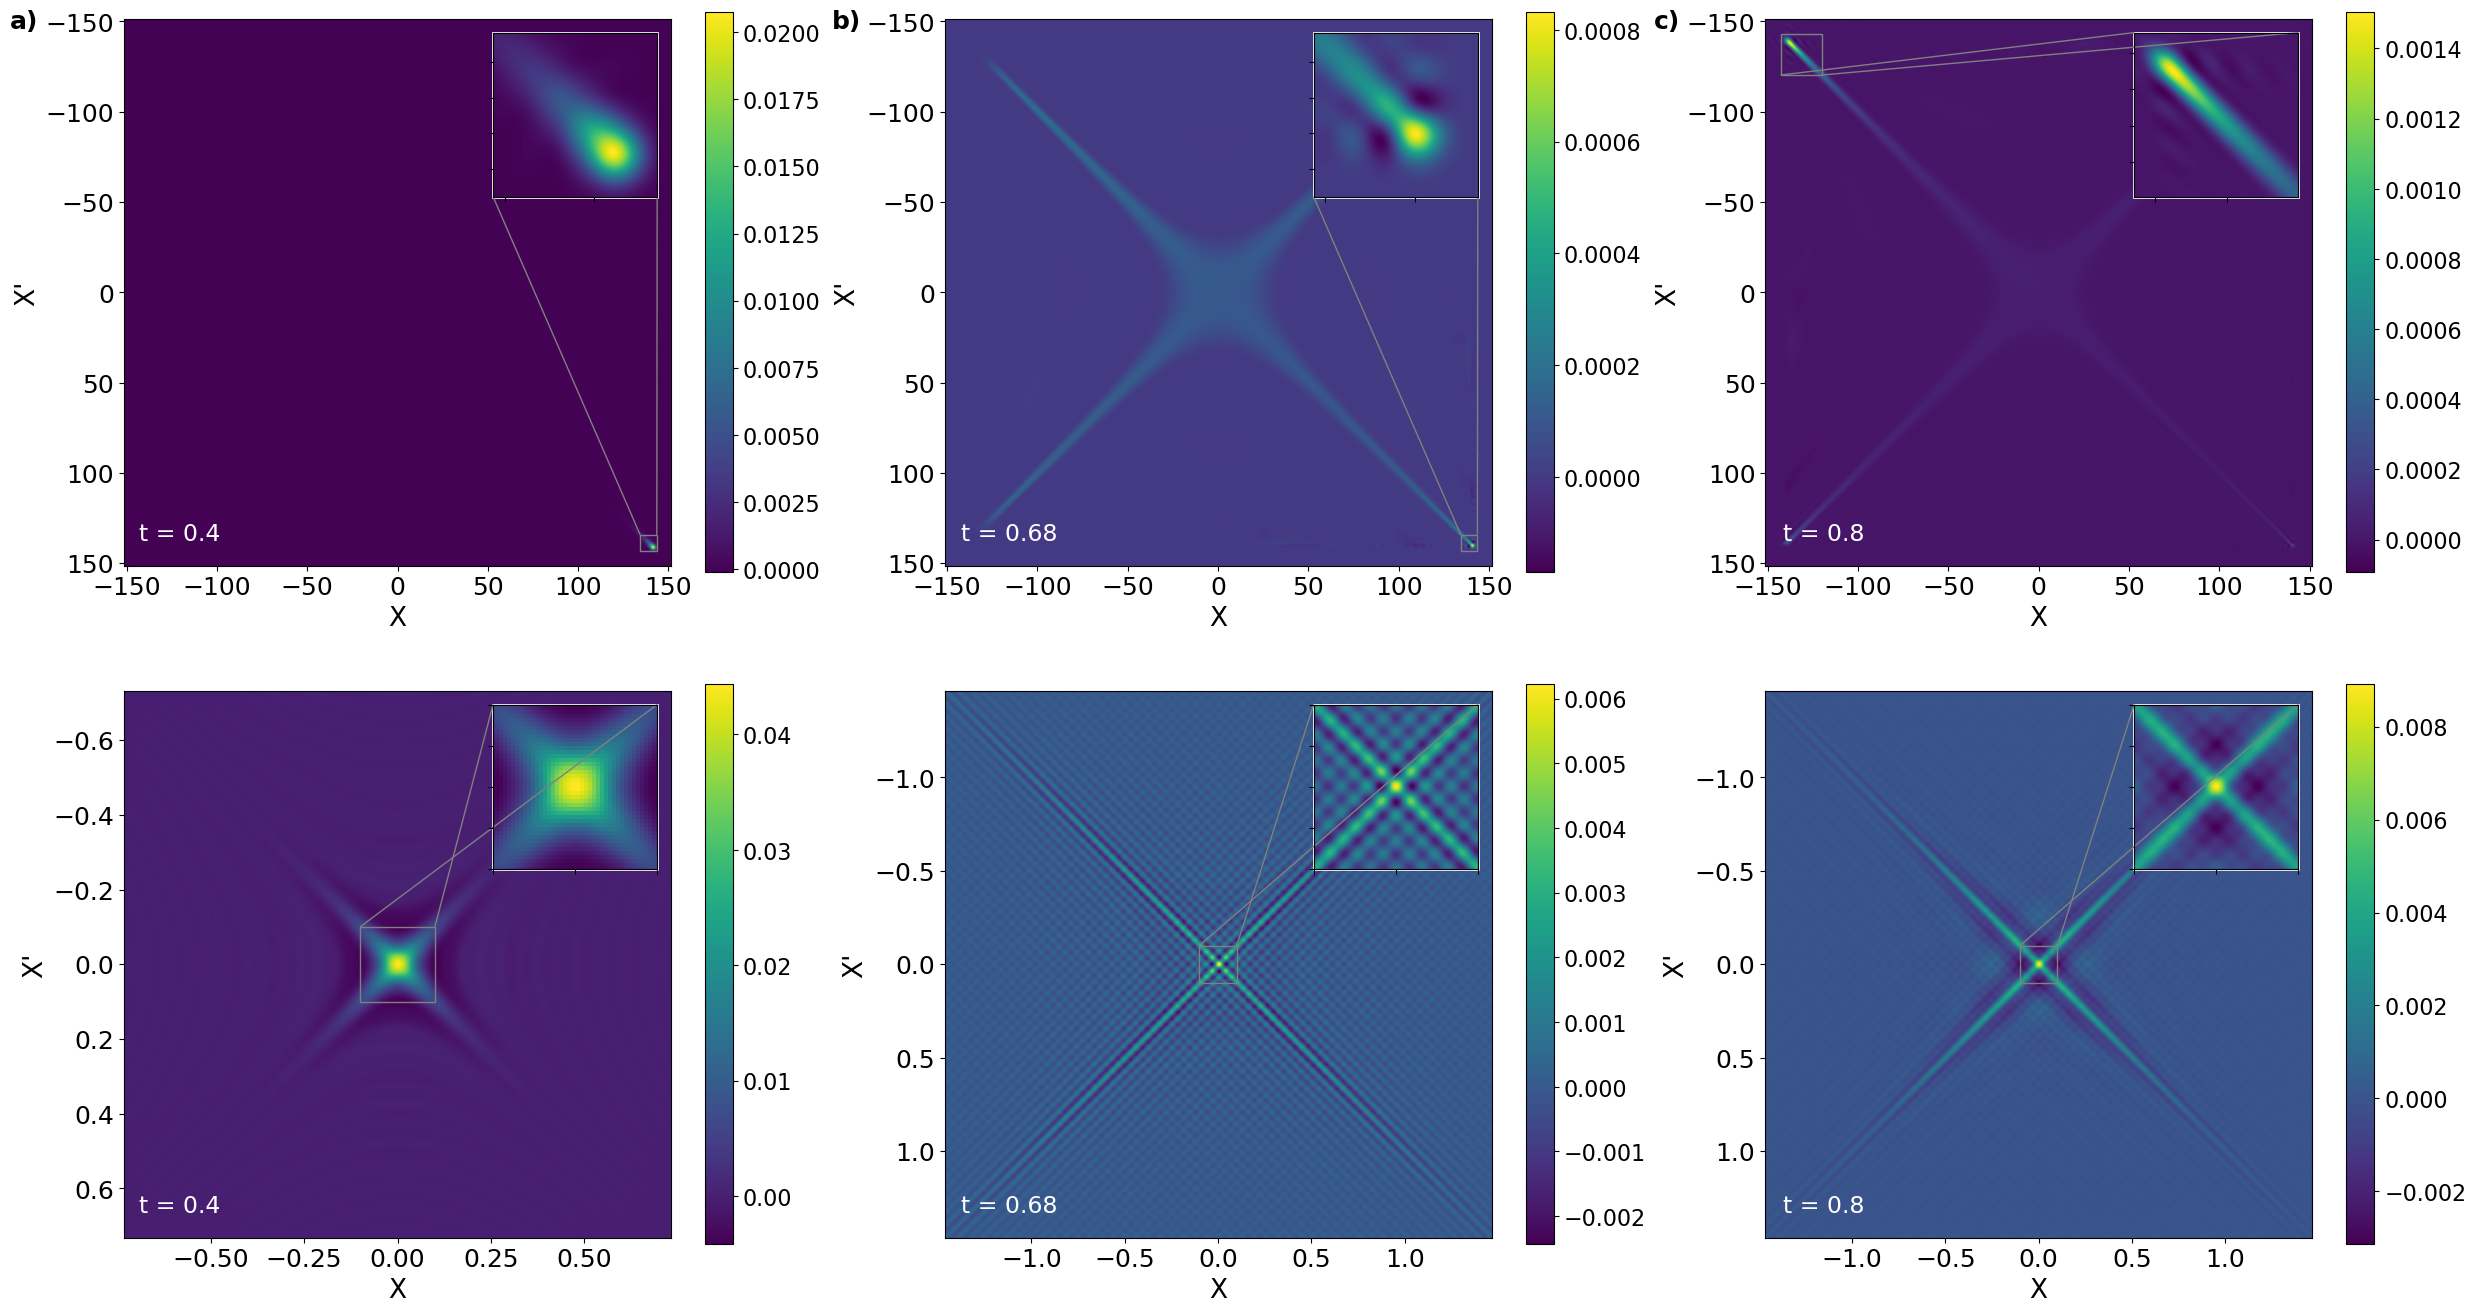

In [109]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

shrink = 1

fig, axes = plt.subplots(2,3, figsize = (30,16))

for i, label in enumerate(['a)', 'b)', 'c)']):
    fig.text(0.087 + i*0.274, 0.87, label, fontsize=18, fontweight='bold')

for i, label in enumerate(['t = 0.4', 't = 0.68', 't = 0.8']):
    fig.text(0.13 + i*0.274, 0.13, label, fontsize=17, color = 'white')

for i, label in enumerate(['t = 0.4', 't = 0.68', 't = 0.8']):
    fig.text(0.13 + i*0.274, 0.55, label, fontsize=17, color = 'white')

# Функция для создания инсета
def create_inset(ax, data, x_bias, x_left, x_right):
    axins = inset_axes(ax, width="30%", height="30%", loc=1, borderpad=1)
    axins.patch.set_edgecolor('white')
    axins.patch.set_linewidth(2)
    
    # Область увеличения (правый нижний угол)
    zoom_x_start = x_bias*0.95
    zoom_x_end = x_bias*1.015
    zoom_y_start = x_bias*0.95
    zoom_y_end = x_bias*1.015
    
    # Показать увеличенную область
    im_zoom = axins.imshow(np.real(data), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
    axins.set_xlim(zoom_x_start, zoom_x_end)
    axins.set_ylim(zoom_y_end, zoom_y_start)
    axins.tick_params(labelleft=False, labelbottom=False)
    
    # Соединительные линии
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", color = "red", ec="0.5")
    return im_zoom

def create_inset_2(ax, data, x_bias, x_left, x_right):
    axins = inset_axes(ax, width="30%", height="30%", loc=1, borderpad=1)
    axins.patch.set_edgecolor('white')
    axins.patch.set_linewidth(2)
    
    # Область увеличения (правый нижний угол)
    zoom_x_start = -x_bias*0.85
    zoom_x_end = -x_bias*1.01
    zoom_y_start = -x_bias*0.85
    zoom_y_end = -x_bias*1.01
    
    # Показать увеличенную область
    im_zoom = axins.imshow(np.real(data), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
    axins.set_xlim(zoom_x_end, zoom_x_start)
    axins.set_ylim(zoom_y_start, zoom_y_end)
    axins.tick_params(labelleft=False, labelbottom=False)
    
    # Соединительные линии
    mark_inset(ax, axins, loc1=2, loc2=1, fc="none", color = "red", ec="0.5")
    return im_zoom

def create_inset_3(ax, data, x_bond, x_left, x_right):
    axins = inset_axes(ax, width="30%", height="30%", loc=1, borderpad=1)
    axins.patch.set_edgecolor('white')
    axins.patch.set_linewidth(2)
    
    # Область увеличения (правый нижний угол)
    zoom_x_start = -x_bond*0.02
    zoom_x_end = x_bond*0.02
    zoom_y_start = -x_bond*0.02
    zoom_y_end = x_bond*0.02
    
    # Показать увеличенную область
    im_zoom = axins.imshow(np.real(data), extent = [-x_left, x_right, x_right, -x_left])
    axins.set_xlim(zoom_x_end, zoom_x_start)
    axins.set_ylim(zoom_y_start, zoom_y_end)
    axins.tick_params(labelleft=False, labelbottom=False)
    
    # Соединительные линии
    mark_inset(ax, axins, loc1=2, loc2=1, fc="none", color = "red", ec="0.5")
    return im_zoom

# Main plots with insets for left column
#im1 = axes[0,0].imshow(np.real(dm1_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
#create_inset(axes[0,0], dm1_pump, x_bias, x_left, x_right)

im3 = axes[0,0].imshow(np.real(dm2_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset(axes[0,0], dm2_pump, x_bias, x_left, x_right)

im5 = axes[0,1].imshow(np.real(dm3_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset(axes[0,1], dm3_pump, x_bias, x_left, x_right)

im7 = axes[0,2].imshow(np.real(dm4_pump), extent = [x_bias-x_left, x_bias+x_right, x_bias+x_right, x_bias-x_left])
create_inset_2(axes[0,2], dm4_pump, x_bias, x_left, x_right)

# Right column plots (без инсетов)
#im2 = axes[1,0].imshow(np.real(dm1_signal), extent = [-x_bond2, x_bond2, x_bond2, -x_bond2])

im4 = axes[1,0].imshow(np.real(dm2_signal)[2048-150:2048+150, 2048-150:2048+150], extent = [-x_bond2*150/2048, x_bond2*150/2048, x_bond2*150/2048, -x_bond2*150/2048])
create_inset_3(axes[1,0], dm2_signal, x_bond2/2, x_bond2, x_bond2)

im6 = axes[1,1].imshow(np.real(dm3_signal)[4096-300:4096+300, 4096-300:4096+300], extent = [-x_bond2*300/2048, x_bond2*300/2048, x_bond2*300/2048, -x_bond2*300/2048])
create_inset_3(axes[1,1], dm3_signal, x_bond2/2, x_bond2, x_bond2)

im8 = axes[1,2].imshow(np.real(dm4_signal)[4096-300:4096+300, 4096-300:4096+300], extent = [-x_bond2*300/2048, x_bond2*300/2048, x_bond2*300/2048, -x_bond2*300/2048])
create_inset_3(axes[1,2], dm4_signal, x_bond2/2, x_bond2, x_bond2)

# Colorbars
#fig.colorbar(im1, ax=axes[0,0], shrink=shrink)
#fig.colorbar(im2, ax=axes[1,0], shrink=shrink)
cbar3 = fig.colorbar(im3, ax=axes[0,0], shrink=shrink)
cbar4 = fig.colorbar(im4, ax=axes[1,0], shrink=shrink)

cbar5 = fig.colorbar(im5, ax=axes[0,1], shrink=shrink)
cbar6 = fig.colorbar(im6, ax=axes[1,1], shrink=shrink)
cbar7 = fig.colorbar(im7, ax=axes[0,2], shrink=shrink)
cbar8 = fig.colorbar(im8, ax=axes[1,2], shrink=shrink)

cbars = [cbar3, cbar4, cbar5, cbar6, cbar7, cbar8]
for cbar in cbars:
    cbar.ax.tick_params(labelsize=16)   

# Labels
for i in range(2):
    for j in range(3):
        axes[i,j].set_xlabel("X", fontsize = 19)
        axes[i,j].set_ylabel("X'", fontsize = 19)
        axes[i,j].tick_params(axis='both', which='major', labelsize=18)

plt.savefig('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/for_article/Density_matrices_horizontally_3.png', bbox_inches='tight')
plt.show()

### Норма разницы правой и левой части

In [136]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-07-30_17-05-01/solutions.pkl', 'rb') as f:
    set_of_solutions_weak = pickle.load(f)

In [137]:
chi = 1 / 2
theta = 0.001

t_general = 0.9
steps_number = 900
delta_t = t_general / steps_number

x_bond1 = 30
x_bond2 = 10

x_left = 10 + 2 * 10 * np.sqrt(2)
x_bias = 10 * np.sqrt(2)
x_right = 15

n1 = 12
n2 = 13

step1 = (x_right + x_left)/2**n1 #x_bond1 / 2**(n1 - 1)
step2 = x_bond2 / 2**(n2 - 1)

n3 = 10
x_bond3 = 10
step3 = x_bond3 / 2**(n3 - 1)

eps = 1e-6

# sp2 = np.linspace(-x_bond2, x_bond2, 2**n2)
# step2 = sp2[1]-sp2[0]

sp1 = np.linspace(x_bias-x_left, x_bias+x_right, 2**n1)
step1_v1 = sp1[1]-sp1[0]

initial_guess = ['approx', 1e-3]

bond_limit = 30

In [138]:
coh_operator_one = mp.der_mpo(n1, step1_v1)
coh_operator_two = mp.mpo_mul_num(mp.x_mpo(n1, x_bias - x_left, step1_v1), -1)
vac_operator_one = mp.mpo_sum(mp.mpo_multiplication(mp.x_mpo(n2, - x_bond2, step2), mp.x_mpo(n2, - x_bond2, step2)), mp.der2_mpo(n2, step2))
vac_operator_two = mp.mpo_sum(mp.one_mpo(n2), mp.mpo_mul_num(mp.mpo_multiplication(mp.x_mpo(n2, - x_bond2, step2), mp.der_mpo(n2, step2)), 2))
first_part = coh_operator_one + vac_operator_one
second_part = coh_operator_two + vac_operator_two
common_operator = mp.mpo_mul_num(mp.mpo_sum(first_part, second_part), chi / (np.sqrt(2)))
final_mpo = mp.mpo_sum(mp.one_mpo(n1 + n2), mp.mpo_mul_num(common_operator, delta_t))

In [139]:
norms_during_evolution = []
for i in tqdm(range(len(set_of_solutions_weak))):
    diff_mps = mp.mps_compression(mp.mps_sum(mp.mps_compression(mp.mpo_x_mps(final_mpo, set_of_solutions_weak[i+1])), mp.mps_mul_num(set_of_solutions_weak[i], -1)))
    norms_during_evolution.append(mp.compute_norm(diff_mps))

100%|███████████████████████████████████████████████████████████████████████████████▉| 900/901 [01:57<00:00,  7.69it/s]


IndexError: list index out of range

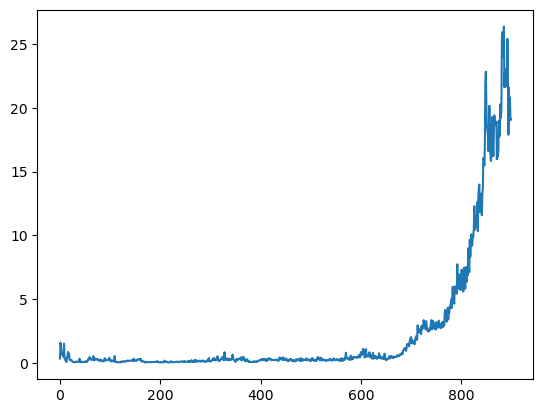

In [46]:
plt.plot(norms_during_evolution)
plt.show()

In [122]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/Tests_of_spdc/Data_for_article/high_amplitude/list_of_solutions_with_tn_alpha_100_the_last_extended.pkl', 'rb') as f:
    set_of_solutions_large_pump = pickle.load(f)

In [123]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-09-09_00-11-00/solutions_.pkl', 'rb') as f:
    set_of_solutions_large_pump_3 = pickle.load(f)

In [124]:
len(set_of_solutions_large_pump_3)

642

In [125]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-09-09_00-11-00/solutions.pkl', 'rb') as f:
    set_of_solutions_large_pump_4 = pickle.load(f)

In [126]:
len(set_of_solutions_large_pump_4)

31

In [127]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-09-10_11-32-08/solutions___.pkl', 'rb') as f:
    set_of_solutions_large_pump_5 = pickle.load(f)

In [128]:
len(set_of_solutions_large_pump_5[0])

136

In [129]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-09-15_11-52-47/solutions.pkl', 'rb') as f:
    set_of_solutions_large_pump_6 = pickle.load(f)

In [130]:
len(set_of_solutions_large_pump_6)

241

In [131]:
set_of_solutions_large_pump_2 = set_of_solutions_large_pump_3[:-1]+set_of_solutions_large_pump_4[:-1]+set_of_solutions_large_pump_5[0][:-1]+set_of_solutions_large_pump_6
len(set_of_solutions_large_pump_2)

1047

In [451]:
# with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/high_pump_high_quality_calc/solutions.pkl', 'wb') as f:
#     pickle.dump(set_of_solutions_large_pump_2, f)

In [120]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-09-08_12-27-22/solutions.pkl', 'rb') as f:
    set_of_solutions_large_pump_2 = pickle.load(f)

In [132]:
chi = 1 / 2
theta = 0.001

t_general = 0.1
steps_number = 1000
delta_t = t_general / steps_number

x_bond1 = 30
x_bond2 = 10

x_left = 10 + 2 * 100 * np.sqrt(2)
x_bias = 100 * np.sqrt(2)
x_right = 10

n1 = 15
n2 = 15

step1 = (x_right + x_left)/2**n1 #x_bond1 / 2**(n1 - 1)
step2 = x_bond2 / 2**(n2 - 1)

n3 = 10
x_bond3 = 10
step3 = x_bond3 / 2**(n3 - 1)

eps = 1e-6

# sp2 = np.linspace(-x_bond2, x_bond2, 2**n2)
# step2 = sp2[1]-sp2[0]

sp1 = np.linspace(x_bias-x_left, x_bias+x_right, 2**n1)
step1_v1 = sp1[1]-sp1[0]

initial_guess = ['approx', 1e-3]

bond_limit = 30

In [133]:
coh_operator_one = mp.der_mpo(n1, step1_v1)
coh_operator_two = mp.mpo_mul_num(mp.x_mpo(n1, x_bias - x_left, step1_v1), -1)
vac_operator_one = mp.mpo_sum(mp.mpo_multiplication(mp.x_mpo(n2, - x_bond2, step2), mp.x_mpo(n2, - x_bond2, step2)), mp.der2_mpo(n2, step2))
vac_operator_two = mp.mpo_sum(mp.one_mpo(n2), mp.mpo_mul_num(mp.mpo_multiplication(mp.x_mpo(n2, - x_bond2, step2), mp.der_mpo(n2, step2)), 2))
first_part = coh_operator_one + vac_operator_one
second_part = coh_operator_two + vac_operator_two
common_operator = mp.mpo_mul_num(mp.mpo_sum(first_part, second_part), chi / (np.sqrt(2)))
final_mpo = mp.mpo_sum(mp.one_mpo(n1 + n2), mp.mpo_mul_num(common_operator, delta_t))

In [134]:
# norms_during_evolution_high_pump = []
# for i in tqdm(range(len(set_of_solutions_large_pump)-1)):
#     diff_mps = mp.mps_compression(mp.mps_sum(mp.mps_compression(mp.mpo_x_mps(final_mpo, set_of_solutions_large_pump[i+1])), mp.mps_mul_num(set_of_solutions_large_pump[i], -1)))
#     norms_during_evolution_high_pump.append(mp.compute_norm(diff_mps))

In [135]:
norms_during_evolution_high_pump_2 = []
for i in tqdm(range(1001)):
    diff_mps = mp.mps_compression(mp.mps_sum(mp.mps_compression(mp.mpo_x_mps(final_mpo, set_of_solutions_large_pump_2[i+1])), mp.mps_mul_num(set_of_solutions_large_pump_2[i], -1)))
    norms_during_evolution_high_pump_2.append(mp.compute_norm(diff_mps))

100%|██████████████████████████████████████████████████████████████████████████████| 1046/1046 [31:05<00:00,  1.78s/it]


In [314]:
# plt.plot(norms_during_evolution_high_pump_2[:642])
# plt.show()

In [315]:
# with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/new/solutions.pkl', 'wb') as f:
#     pickle.dump(set_of_solutions_large_pump_2[:642], f)

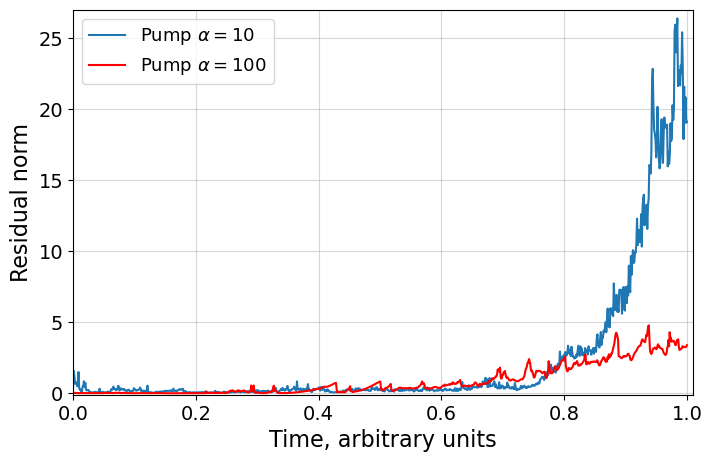

In [409]:
fig, ax1 = plt.subplots(figsize = (8,5))
plt.grid(alpha=0.5)
plt.xlabel('Time, arbitrary units', fontsize=16)
plt.ylabel('Residual norm', fontsize=16)
plt.plot(np.linspace(0,1,len(norms_during_evolution)), norms_during_evolution, label = r"Pump $\alpha = 10$")
plt.plot(np.linspace(0,len(norms_during_evolution_high_pump_2[:1000])/1000,len(norms_during_evolution_high_pump_2[:1000])), np.array(norms_during_evolution_high_pump_2[:1000])/np.sqrt(32), 'r-', label = r"Pump $\alpha = 100$")
plt.legend(fontsize=13)
plt.xlim(0,1.01)
plt.ylim(-0.1,27)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax1.tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/for_article/Computational_error_3.png', bbox_inches='tight')
plt.show()

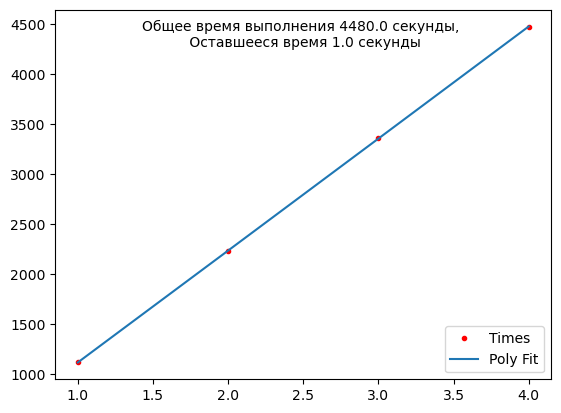

100%|████████████████████████████████████████████████████████████████████████████████| 4/4 [1:14:38<00:00, 1119.64s/it]


In [383]:
photon_number_dynamics7 = mp.calculate_photon_number_in_set_of_solutions(set_of_solutions_large_pump_2[1010:], n1, n2, x_left, x_bond2, step1_v1, step2, x_bias, solver=mp.calculate_photon_number3, step=10)

In [386]:
photon_dynamics_hq_0 = np.array(photon_number_dynamics2[0]+photon_number_dynamics3[0]+photon_number_dynamics4[0]+photon_number_dynamics5[0]+photon_number_dynamics6[0]+photon_number_dynamics7[0])
photon_dynamics_hq_1 = np.array(photon_number_dynamics2[1]+photon_number_dynamics3[1]+photon_number_dynamics4[1]+photon_number_dynamics5[1]+photon_number_dynamics6[1]+photon_number_dynamics7[1])
photon_dynamics_hq_2 = 2*np.array(photon_number_dynamics2[0]+photon_number_dynamics3[0]+photon_number_dynamics4[0]+photon_number_dynamics5[0]+photon_number_dynamics6[0]+photon_number_dynamics7[0]) + np.array(photon_number_dynamics2[1]+photon_number_dynamics3[1]+photon_number_dynamics4[1]+photon_number_dynamics5[1]+photon_number_dynamics6[1]+photon_number_dynamics7[1])
photon_dynamics_hq = [photon_dynamics_hq_0, photon_dynamics_hq_1, photon_dynamics_hq_2]                    

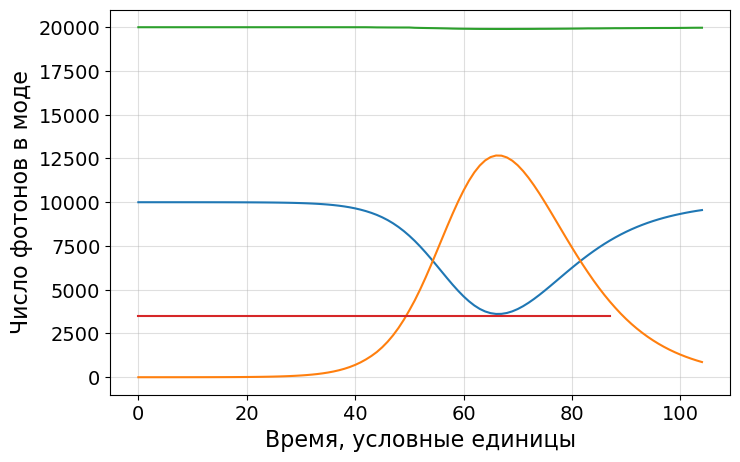

In [384]:
fig, ax1 = plt.subplots(figsize = (8,5))
plt.grid(alpha=0.4)
ax1.set_xlabel("Время, условные единицы", fontsize = 16)
ax1.set_ylabel("Число фотонов в моде", fontsize = 16)
line1, = ax1.plot(np.array(photon_number_dynamics2[0]+photon_number_dynamics3[0]+photon_number_dynamics4[0]+photon_number_dynamics5[0]+photon_number_dynamics6[0]+photon_number_dynamics7[0]), label = "Photons in pump mode (tensor networks)")
line2, = ax1.plot(photon_number_dynamics2[1]+photon_number_dynamics3[1]+photon_number_dynamics4[1]+photon_number_dynamics5[1]+photon_number_dynamics6[1]+photon_number_dynamics7[1], label = "Photons in signal mode (tensor networks)")
line3, = ax1.plot(2*np.array(photon_number_dynamics2[0]+photon_number_dynamics3[0]+photon_number_dynamics4[0]+photon_number_dynamics5[0]+photon_number_dynamics6[0]+photon_number_dynamics7[0]) + np.array(photon_number_dynamics2[1]+photon_number_dynamics3[1]+photon_number_dynamics4[1]+photon_number_dynamics5[1]+photon_number_dynamics6[1]+photon_number_dynamics7[1])-1.2, label = "Total energy of the system in the number of photons")
line4, = ax1.plot(np.linspace(0,87, 10), 3500*np.ones(10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax1.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('photon_dynamics.png', bbox_inches='tight')
plt.show()

In [387]:
# with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/high_pump_high_quality_calc/photon_dynamics.pkl', 'wb') as f:
#     pickle.dump(photon_dynamics_hq, f)

### Сжатие в ходе квантовой эволюции в процессе SPDC

In [2]:
with open ('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/2025-07-30_17-05-01/solutions.pkl', 'rb') as f:
    solutions_in_the_case_of_weak_pump = pickle.load(f)
len(solutions_in_the_case_of_weak_pump[0])

25

In [3]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/high_pump_high_quality_calc/solutions.pkl', 'rb') as f:
    solutions_in_the_case_of_strong_pump = pickle.load(f)[:1001]

In [4]:
def compute_squeezing_parameter(density_matrix, x_operator):
    return compute_mpo_trace(mp.mpo_multiplication(density_matrix, mp.mpo_multiplication(x_operator, x_operator))) - (compute_mpo_trace(mp.mpo_multiplication(density_matrix, x_operator)))**2

In [5]:
def compute_mpo_trace(mpo):
    t_list = []
    for tensor in mpo:
        t_list.append(np.einsum("ijjk -> ik", tensor))

    first_tensor = t_list[0]
    for i in range(len(t_list)-1):
        first_tensor = np.einsum("ij, jk -> ik", first_tensor, t_list[i+1])
    return first_tensor    

In [6]:
def find_reduced_dm_mpo(mps, position, length):
    mpo = []
    l = len(mps)
    state_part = mps[position*(l - length):length*(1-position)+l*position]
    env_part = mps[(1-position)*length:(l-length)*position+l*(1-position)]

    end_part = mp.contract_two_mps(env_part, env_part)
    if position == 0:
        end_part = end_part.reshape(end_part.shape[0]*end_part.shape[1], 1)
    else:
        end_part = end_part.reshape(1, end_part.shape[0]*end_part.shape[1])
    
    #if position == 0:
    #    env_tensor = np.einsum("ij, lj -> il", env_part[-1].reshape(env_part[-1].shape[0], env_part[-1].shape[1]), np.conj(env_part[-1].reshape(env_part[-1].shape[0], env_part[-1].shape[1])))
    #    for i in range(len(env_part)-1):
    #        g = 1

    for tensor in state_part:
        mpo_tensor = np.einsum("ijk, abc -> iajbkc", tensor, np.conj(tensor))
        sh = mpo_tensor.shape
        mpo_tensor = mpo_tensor.reshape(sh[0]*sh[1], sh[2], sh[3], sh[4]*sh[5])
        mpo.append(mpo_tensor)

    if position == 0:
        mpo[-1] = np.einsum("ijkl, lg -> ijkg", mpo[-1], end_part)
    else:
        mpo[0] = np.einsum("gi, ijkl -> gjkl", end_part, mpo[0])
    
    return mpo

In [7]:
squeezing_weak = []
for i in tqdm(range(0, len(solutions_in_the_case_of_weak_pump), 20)):
    solution = mp.mps_mul_num(solutions_in_the_case_of_weak_pump[i], 1/mp.compute_norm(solutions_in_the_case_of_weak_pump[i]))
    signal_dm = find_reduced_dm_mpo(solution, 1, 13) 
    squeezing_weak.append(compute_squeezing_parameter(signal_dm, mp.x_mpo(13, -10, 0.00244140625)))

100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [02:17<00:00,  2.98s/it]


In [8]:
squeezing_strong = []
for i in tqdm(range(0, len(solutions_in_the_case_of_strong_pump), 20)):
    solution = mp.mps_mul_num(solutions_in_the_case_of_strong_pump[i], 1/mp.compute_norm(solutions_in_the_case_of_strong_pump[i]))
    signal_dm = find_reduced_dm_mpo(solution, 1, 15) 
    squeezing_strong.append(compute_squeezing_parameter(signal_dm, mp.x_mpo(15, -10, 0.0006103515625)))

 49%|████████████████████████████████████████▏                                         | 25/51 [12:04<12:33, 28.98s/it]


MemoryError: Unable to allocate 1.54 GiB for an array with shape (14400, 14400) and data type float64

In [80]:
mps_ex = mp.sym_gauss_mps(3, 1, 10)
contracted_tensor = mp.contract_two_mps(mps_ex[:2], mps_ex[:2])
contracted_tensor.shape

(4, 4)

In [77]:
for i in mps_ex:
    print(i.shape)

(1, 2, 2)
(2, 2, 4)
(4, 2, 8)
(8, 2, 8)
(8, 2, 8)
(8, 2, 6)
(6, 2, 6)
(6, 2, 6)
(6, 2, 4)
(4, 2, 1)


In [94]:
#mp.find_reduced_dm_mpo(solutions_in_the_case_of_weak_pump[1], 1, 13)

In [97]:
mp.contract_two_mps(solutions_in_the_case_of_weak_pump[0][12:], solutions_in_the_case_of_weak_pump[0][12:], output = "number")

115.5319219708611

In [9]:
squeezing_strong_changed = [h[0][0] for h in squeezing_strong]

In [10]:
squeezing_weak_changed = [l[0][0] for l in squeezing_weak]
squeezing_weak_changed

[0.4998779371189257,
 0.33515944099320183,
 0.22483983559326504,
 0.15082127800685236,
 0.10133486991409796,
 0.0684181026322233,
 0.046810287657240844,
 0.03307415303632263,
 0.02503898521023414,
 0.021417735083379266,
 0.021553461537296325,
 0.025226387407982127,
 0.03247261828850623,
 0.043384440351624726,
 0.057874649572975626,
 0.0754573759454995,
 0.09510799846918686,
 0.11530195447009085,
 0.13422987663363314,
 0.15015219941783897,
 0.16173291675601062,
 0.16826708913081553,
 0.16977475508276962,
 0.1668802178604125,
 0.16066852384807903,
 0.1524359015057657,
 0.14359160025688875,
 0.13560316274769127,
 0.1300517147059662,
 0.128726147600083,
 0.13379002469440476,
 0.1481286889909175,
 0.1758114931559714,
 0.22295554941681153,
 0.298023595866799,
 0.4120607255560949,
 0.5802447997099329,
 0.8261271108048878,
 1.1797437394587456,
 1.6656244093207655,
 2.263084538508885,
 2.9024240503065175,
 3.4407890362269424,
 3.6858728265631733,
 3.723868314222828,
 3.3951204608003884]

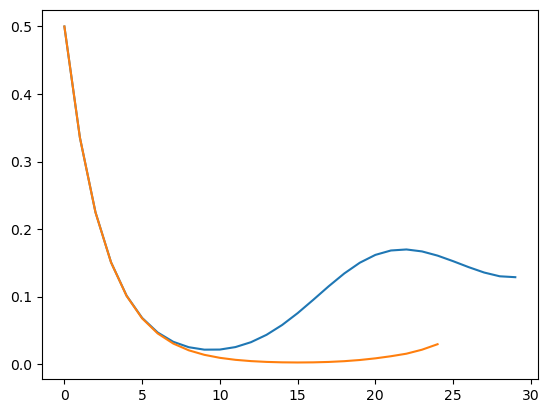

In [11]:
plt.plot(squeezing_weak_changed[:30])
plt.plot(squeezing_strong_changed)
plt.show()

### Квантовое сжатие в ходе эволюции

In [327]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/for_article/Quadrature_variance_weak_case.pkl', 'rb') as f:
     quadrature_variance_weak_case = pickle.load(f)[:41]

In [328]:
with open('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/for_article/Quadrature_variance_strong_case.pkl', 'rb') as f:
     quadrature_variance_strong_case = pickle.load(f)[:41]

In [329]:
squeezing_weak_changed = [l[0][0] for l in quadrature_variance_weak_case]
squeezing_strong_changed = [h[0][0] for h in quadrature_variance_strong_case]

In [330]:
n = 100
1/(10*n)**(0.25)/16

0.011114246312743267

In [331]:
def x_quadrature(t, N):
    u = t * np.sqrt(N)
    return (np.exp(-2*u) + np.exp(2*u)/(16*N)*(1+(3-8*u)*np.exp(-2*u)-(1+8*u-8*u**2)*np.exp(-4*u) - 3*np.exp(-6*u)))/2 #- (3*np.exp(4*u)-(19/4-24*u+32*u**2)*np.exp(2*u)+60-112*u-(80+58*u-48*u**2-128*u**3/3+32*u**4)*np.exp(-2*u)+(33+48*u+96*u**2)*np.exp(-4*u)-45*np.exp(-6*u)/4)/(256*N**2)/2

In [332]:
x = np.linspace(0, 1, 1000)

In [333]:
min(x_quadrature(x, 1000)), np.argmin(x_quadrature(x, 100))

(0.007401276553574845, 187)

In [343]:
high_amp = min(x_quadrature(x, 10000))
high_amp_t = np.argmin(x_quadrature(x, 10000))/1000*10
low_amp = min(x_quadrature(x, 100))
low_amp_t = np.argmin(x_quadrature(x, 100))/1000
high_amp, high_amp_t, low_amp, low_amp_t

(0.002434927002340541, 0.3, 0.0213840919303032, 0.187)

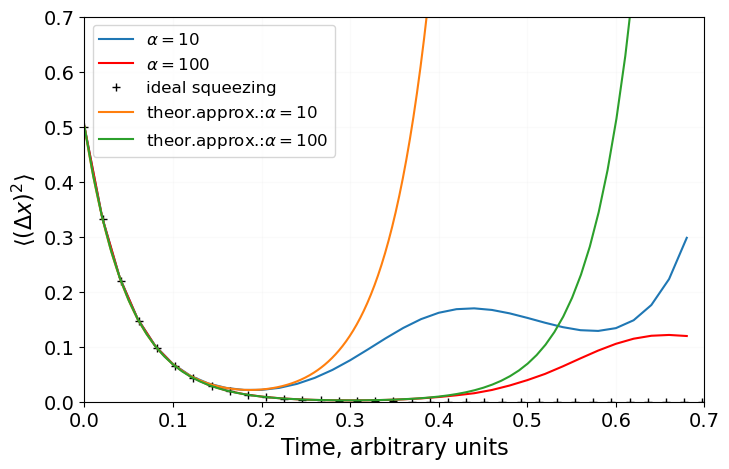

In [338]:
i_cut = 35
plt.figure(figsize=(8,5))
plt.xlabel('Time, arbitrary units', fontsize=16)
plt.ylabel(r'$\langle(\Delta x)^2 \rangle$', fontsize=16)
plt.plot(np.linspace(0, 0.8, len(squeezing_weak_changed))[:i_cut], squeezing_weak_changed[:i_cut], label = r'$\alpha=10$')
plt.plot(np.linspace(0, 0.8, len(squeezing_strong_changed))[:i_cut], squeezing_strong_changed[:i_cut], 'r-', label = r'$\alpha=100$')
plt.plot(np.linspace(0, 0.8, 40)[:i_cut], 0.5*np.exp(-2*np.linspace(0, 8, 40))[:i_cut], linestyle = 'None', marker = '+', color = 'black', label = 'ideal squeezing')
#plt.plot(np.linspace(0,0.8,10), [0.25/10]*10)
#plt.plot(np.linspace(0,0.8,10), [0.25/100]*10)
#plt.plot(x, [min(x_quadrature(x, 100))]*1000)
plt.plot(x, x_quadrature(x, 100), label = r'theor.approx.:$\alpha=10$')
#plt.plot(x, [min(x_quadrature(x, 10000))]*1000)
plt.plot(x*10, x_quadrature(x, 10000), label = r'theor.approx.:$\alpha=100$')
plt.grid(alpha=0.05)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.xlim(0,0.7)
plt.ylim(0,0.7)
#plt.savefig('C:/Users/kaprn/Desktop/MPS_directory/TensorNetworks/for_article/Quantum_squeezing.png', bbox_inches='tight')
plt.show()

In [288]:
np.log(16*10000)/4

2.995732273553991

In [222]:
min(squeezing_weak_changed), min(squeezing_strong_changed)

(0.021417735083407687, 0.0024287994445074484)

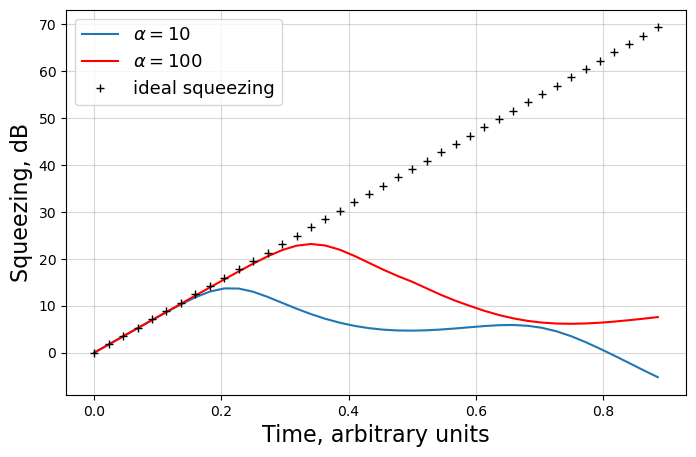

In [167]:
i_cut = 40
plt.figure(figsize=(8,5))
plt.grid(alpha=0.5)
plt.xlabel('Time, arbitrary units', fontsize=16)
plt.ylabel('Squeezing, dB', fontsize=16)
plt.plot(np.linspace(0, 1, len(squeezing_weak_changed))[:i_cut], (-10*np.log10(np.array(squeezing_weak_changed)/squeezing_weak_changed[0]))[:i_cut], label = r'$\alpha=10$')
plt.plot(np.linspace(0, 1, len(squeezing_strong_changed))[:i_cut], (-10*np.log10(np.array(squeezing_strong_changed)/squeezing_strong_changed[0]))[:i_cut], 'r-', label = r'$\alpha=100$')
plt.plot(np.linspace(0, 1, 45)[:i_cut], -10*np.log10(0.5*np.exp(-2*np.linspace(0, 9, 45))*2)[:i_cut], linestyle = 'None', marker = '+', color = 'black', label = 'ideal squeezing')
plt.legend(fontsize = 13)
plt.show()